## LABORATORIO 1
#### Series de Tiempo
Ignacio Méndez (22613) y Diego Soto (22737)

In [1]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
importacion = pd.read_excel("Datos.xlsx", sheet_name= "IMPORTACION", header=6) 
importacion = importacion.iloc[:288].reset_index(drop=True)

consumo = pd.read_excel("Datos.xlsx", sheet_name= "CONSUMO", header=6) 
consumo = consumo.iloc[:300].reset_index(drop= True)

In [3]:
importaciones = importacion[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]
consumos = consumo[["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]]

importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])
consumos.dtypes

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_4100\2987316155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Fecha"] = pd.to_datetime(importaciones["Fecha"])
C:\Users\dfsf2\AppData\Local\Temp\ipykernel_4100\2987316155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Fecha"] = pd.to_datetime(consumos["Fecha"])


Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object

# Verificación de Normalidad

In [5]:
# Verificacion de normalidad 

stat, p = shapiro(importaciones["Gasolina regular"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(importaciones["Gasolina superior"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(importaciones["Diesel alto azufre"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Gasolina regular"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Gasolina superior"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")

stat, p = shapiro(consumos["Diesel alto azufre"].dropna())
print(f"Estadístico: {stat}, p-valor: {p}")


Estadístico: 0.9050020778125639, p-valor: 1.6854999268180919e-12
Estadístico: 0.9737279009601227, p-valor: 3.9058785496496804e-05
Estadístico: 0.8981672488221605, p-valor: 5.238734057074212e-13
Estadístico: 0.8451814325223732, p-valor: 1.1400719307236677e-16
Estadístico: 0.9128550027764982, p-valor: 3.5068043264899102e-12
Estadístico: 0.8036152995436474, p-valor: 9.372158444314801e-19


Analizando la normalidad de los tipos de gasolina (regular, super, diesel) en importaciones y consumo se puede ver que todas las variables muestran normalidad. Es decir que todo las muestras de distribuyen de manera normal. 

# Promedios por mes (Importaciones)

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\3101934463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_num"] = importaciones["Fecha"].dt.month


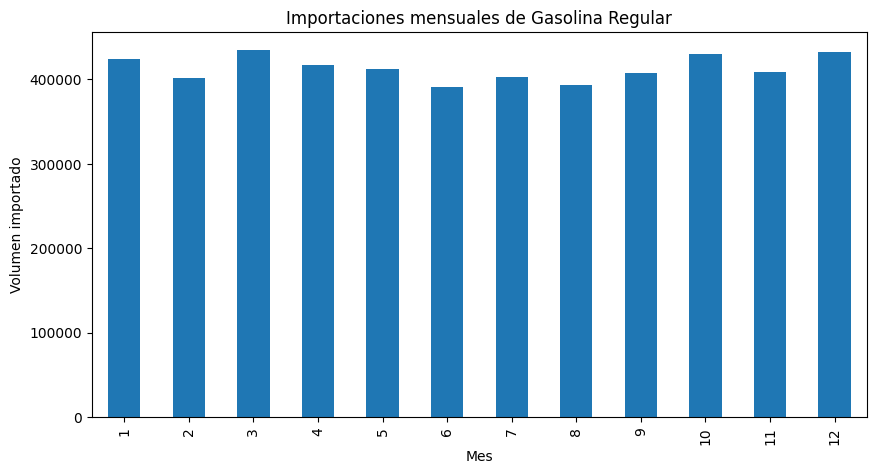

Mes_num
1     424503.400615
2     400987.122500
3     434328.180000
4     416968.295125
5     412757.633333
6     390716.777500
7     402959.611667
8     393761.172083
9     407069.965833
10    430511.622750
11    408465.202500
12    432362.940417
Name: Gasolina regular, dtype: float64


In [6]:

importaciones["Mes_num"] = importaciones["Fecha"].dt.month

pro_mensual = importaciones.groupby(["Mes_num"])["Gasolina regular"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Gasolina Regular")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()

print(pro_mensual)


Analizando el promedio por mes de las importaciones de gasolina regular se puede observar que el mes con mayor importación es el mes de Marzo, alcanzando un promedio de 434,328 barriles. El mes con menor importacion en promedio es Junio, con un promedio de 390,716 barriles. Como se puede observar el promedio de importaciones por mes tiene un cambio minimo, ya que solamente varia por 45,000 barriles, lo cual no es muy alto. 

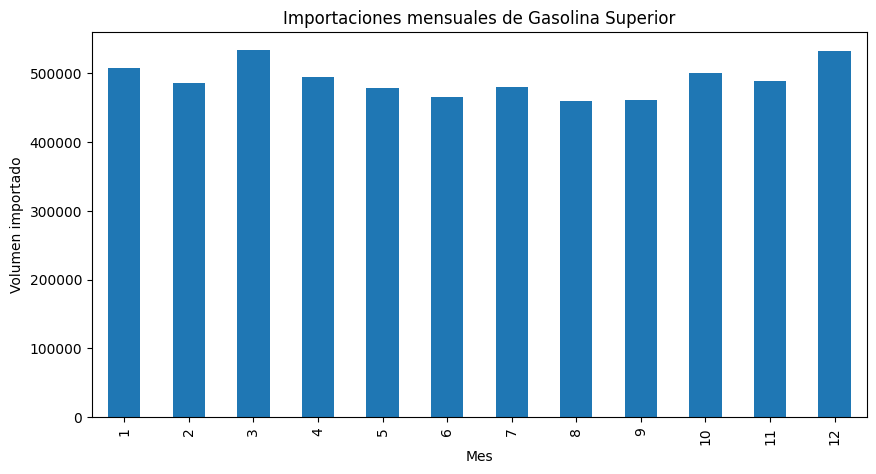

Mes_num
1     507509.570833
2     486170.392500
3     533668.001667
4     495285.526667
5     478710.368750
6     466322.313750
7     480137.811958
8     459568.110833
9     460956.142917
10    500889.889167
11    489149.045000
12    533085.420417
Name: Gasolina superior, dtype: float64


In [7]:
pro_mensual = importaciones.groupby(["Mes_num"])["Gasolina superior"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Gasolina Superior")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()

print(pro_mensual)

Analizando el promedio por mes de las importaciones de gasolina superior se puede observar que el mes con mayor importación es el mes de Diciembre, alcanzando un promedio de 533,085 barriles. El mes con menor importacion en promedio es Agosto, con un promedio de 459,568 barriles. Como se puede observar el promedio de importaciones por mes es más elevado que la gasolina regular, ya que en este caso se puede observar que el mayor cambio es de aproximadamente 70,000 barriles. Además las importaciones son mayores en promedio que la gasolina regular. 

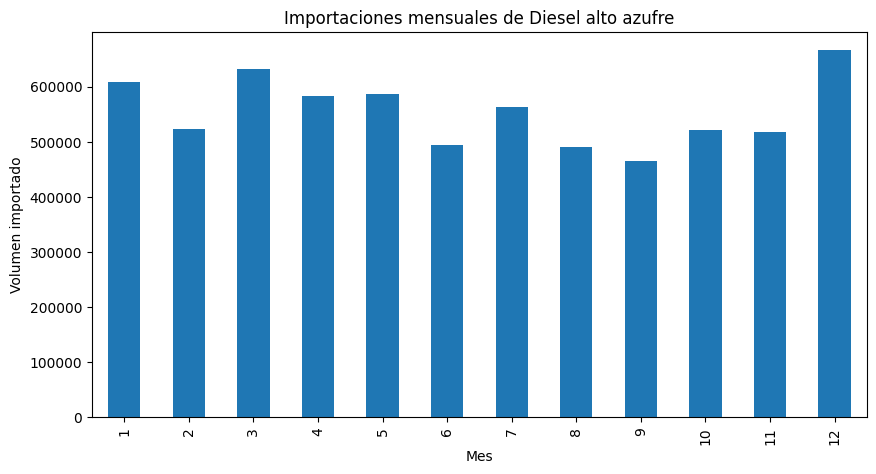

Mes_num
1     608368.434167
2     523572.530417
3     632727.754583
4     583115.942750
5     585919.275417
6     493225.645417
7     562228.856250
8     491020.587083
9     464951.148333
10    521008.000000
11    517420.836250
12    665901.430833
Name: Diesel alto azufre, dtype: float64


In [8]:
pro_mensual = importaciones.groupby(["Mes_num"])["Diesel alto azufre"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Importaciones mensuales de Diesel alto azufre")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.show()

print(pro_mensual)

Analizando el promedio por mes de las importaciones de gasolina diesel se puede observar que el mes con mayor importación es el mes de Diciembre, alcanzando un promedio de 665,901 barriles. El mes con menor importacion en promedio es Septiembre, con un promedio de 464,951 barriles. Adicionalmente se puede observar que Enero y Diciembre son los meses con mayor importación de diesel alcanzando arriba de 600,000 barriles. El diesel a comparación de la gasolina regular y super tiene mayores variaciones, no es tan constante durante el año. 

# Promedios por mes (Consumo)

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\3150604467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Mes_num"] = consumos["Fecha"].dt.month


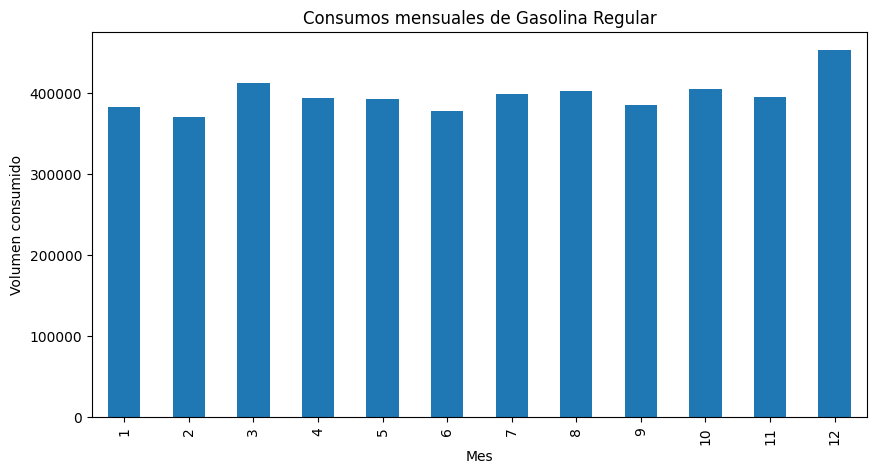

Mes_num
1     383185.687333
2     369956.867333
3     411988.348533
4     394359.671433
5     393026.630933
6     378066.094133
7     398433.337333
8     402503.807333
9     385355.633152
10    405274.873333
11    394711.527933
12    452884.254705
Name: Gasolina regular, dtype: float64


In [9]:
consumos["Mes_num"] = consumos["Fecha"].dt.month

pro_mensual = consumos.groupby(["Mes_num"])["Gasolina regular"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Gasolina Regular")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

print(pro_mensual)

El mes con mayor consumo de gasolina regular es Diciembre, esto es importante ya que en importación de gasolina regular el mes con mayor importación es Marzo. Lo que indica que no necesariamente los meses con mayor importación representan los meses con mayor consumo, por lo menos para la gasolina regular. 

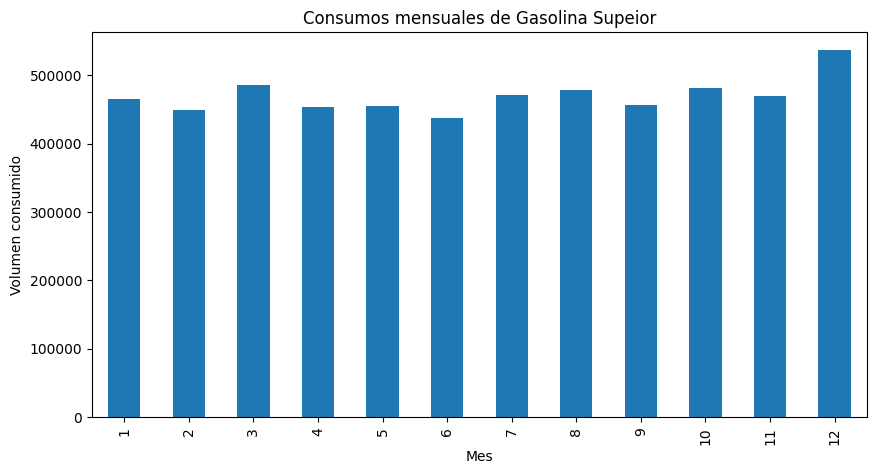

Mes_num
1     465444.133900
2     449589.379500
3     485997.725420
4     454148.854300
5     455444.417900
6     437856.819500
7     471367.123900
8     478979.751100
9     456616.414433
10    481344.612300
11    469803.929900
12    536390.984033
Name: Gasolina superior, dtype: float64


In [10]:
pro_mensual = consumos.groupby(["Mes_num"])["Gasolina superior"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Gasolina Supeior")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

print(pro_mensual)

En el caso de la gasolina super, se puede observar que el mes con mayor consumo es Diciembre este coincide con el mes de mayor importación. El mes de Diciembre representa un pico a comparación de los otros meses en consumo de gasolina super. 

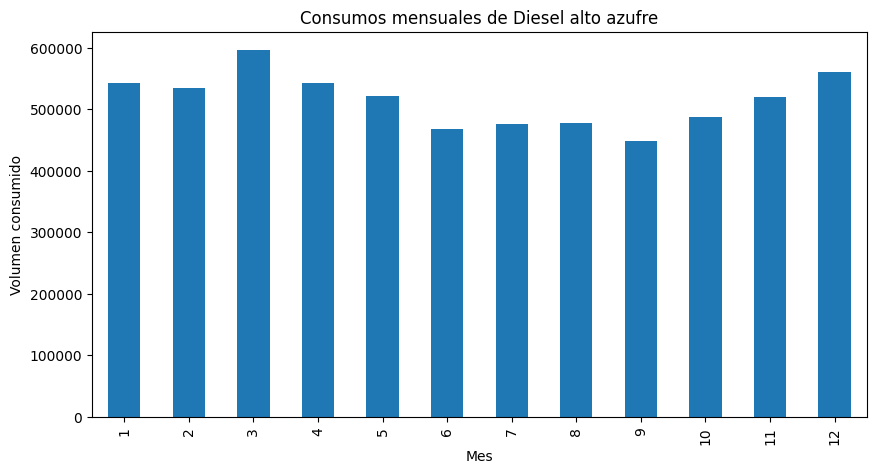

Mes_num
1     542594.861848
2     534185.231238
3     595864.636895
4     543003.669910
5     520845.624667
6     467567.321829
7     475682.383192
8     478067.624152
9     447902.429552
10    487125.373352
11    519670.394952
12    560665.995352
Name: Diesel alto azufre, dtype: float64


In [11]:
pro_mensual = consumos.groupby(["Mes_num"])["Diesel alto azufre"].mean().sort_index()

plt.figure(figsize=(10,5))
pro_mensual.plot(kind="bar")
plt.title("Consumos mensuales de Diesel alto azufre")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.show()

print(pro_mensual)  

Para la gasolina Diesel se puede observar que el mes con mayor consumo es el mes de Marzo, a comparación con los otros tipos de gasolina que mostraban un consumo mayor en Diciembre. Además diesel en importación mostraba picos en los meses de Enero y Diciembre, mientras que en consumo no son los meses más altos.  

# Comparación de importaciones por tipo de gasolina

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\2905355110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Año"] = importaciones["Fecha"].dt.year


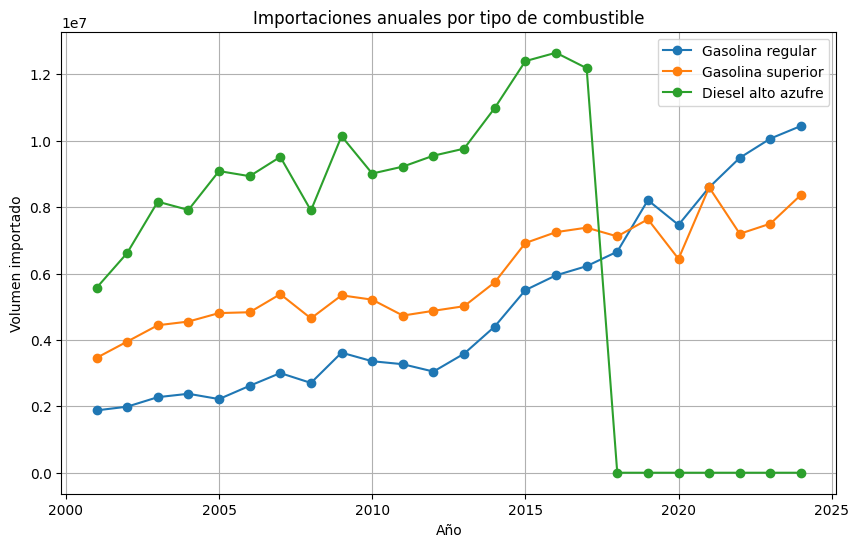

In [12]:
importaciones["Año"] = importaciones["Fecha"].dt.year
importaciones.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum().plot(
    kind="line", marker="o", figsize=(10,6)
)
plt.title("Importaciones anuales por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Volumen importado")
plt.grid(True)
plt.show()


Se realizó una gráfica para comparar las importaciones por tipo de gasolina, en este se puede observar que el tipo de gasolina con mayor importación es diesel. Esto se debe a que la mayoria de transporte pesado utiliza diesel por lo tanto la importación es mayor que la gasolina regular y super. Para el diesel alto en azufre se puede observar que desde el año 2018 las importaciones se fueron a 0. Lo que puede indicar el desuso de este tipo de gasolina en el país. 

Para la gasolina regular y super se puede observar que las variaciones entre los tipos de gasolina no es muy distinta y no se separan demasiado durante el tiempo. Siguen una misma tendecia. Como ultimo se puede observar que desde el 2019 la cantidad de importaciones sobrepasa a las importaciones de super.  

# Comparación de consumo por tipo de gasolina

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\1734223285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Año"] = consumos["Fecha"].dt.year


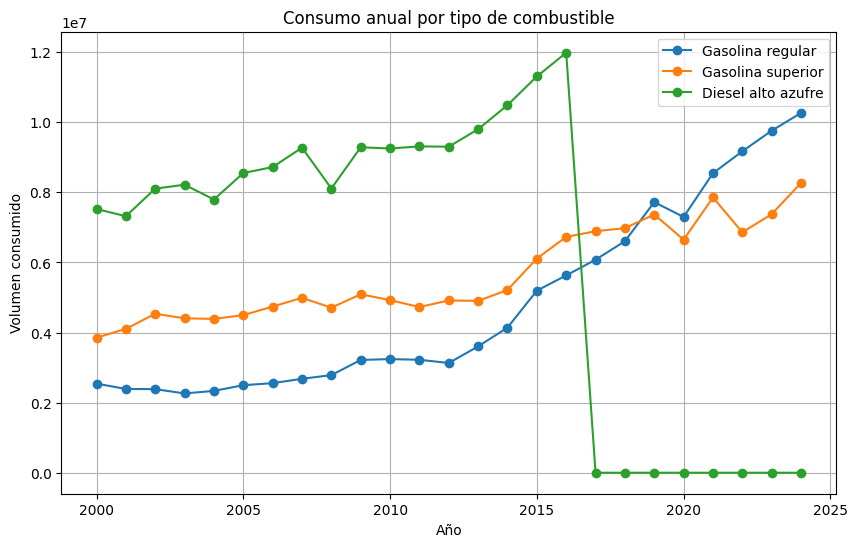

In [13]:
consumos["Año"] = consumos["Fecha"].dt.year
consumos.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].sum().plot(
    kind="line", marker="o", figsize=(10,6)
)
plt.title("Consumo anual por tipo de combustible")
plt.xlabel("Año")
plt.ylabel("Volumen consumido")
plt.grid(True)
plt.show()

En el caso de consumo se puede observar que es muy parecido a importaciones, donde la gasolina diesel es la de mayor consumo seguida por gasolina super y regular. Además tambien se puede observar que la gasolina regular en 2019 paso en consumo a la gasolina super, esto tambien se pudó observar en las importaciones. Como ultimo la gasolina diesel se dejo de consumir en 2017, esto indica que la gasolina diesel alto en azufre todavia se importo un año más que los años consumidos. 

# Importación mensual durante pandemia (2020-2021)

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\1392560681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')
C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\1392560681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)


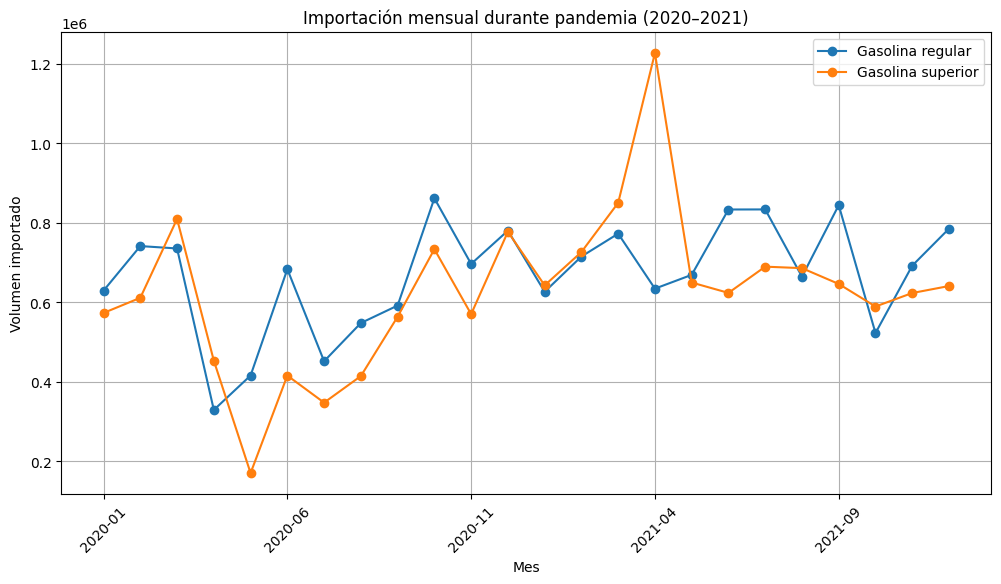

In [14]:
importaciones["Mes_nombre"] = importaciones["Fecha"].dt.strftime('%b')

pandemia = importaciones[importaciones["Año"].isin([2020, 2021])]

pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)

mensual_pandemia = pandemia.groupby("Año_Mes")[["Gasolina regular", "Gasolina superior"]].sum()

mensual_pandemia.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Importación mensual durante pandemia (2020–2021)")
plt.xlabel("Mes")
plt.ylabel("Volumen importado")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Analizando la cantidad importada por mes durante los años de 2020-2021, es decir pandemia, se puede observar que hay una baja en las importaciones en el mes de Abril y Mayo. Esto se debe a que el covid fue detectado en el país en Marzo y se realizó un cierre practicamente total del país desde ese mes. Por consiguiente los meses proximos (abril y mayo) sufrieron una baja en las importaciones, luego de estos meses es decir junio 2020, las importaciones volvieron a subir poco a poco hasta alcanzar valores normales. Un mes a destacar es el mes de Abril de 2021, en este mes se puede observar un pico extremedamente alto en gasolina super el cual baja a niveles normales en para el mes siguente. 

# Consumo mensual durante pandemia (2020-2021)

C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\814016424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumos["Mes_nombre"] = consumos["Fecha"].dt.strftime('%b')
C:\Users\nanum\AppData\Local\Temp\ipykernel_23816\814016424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)


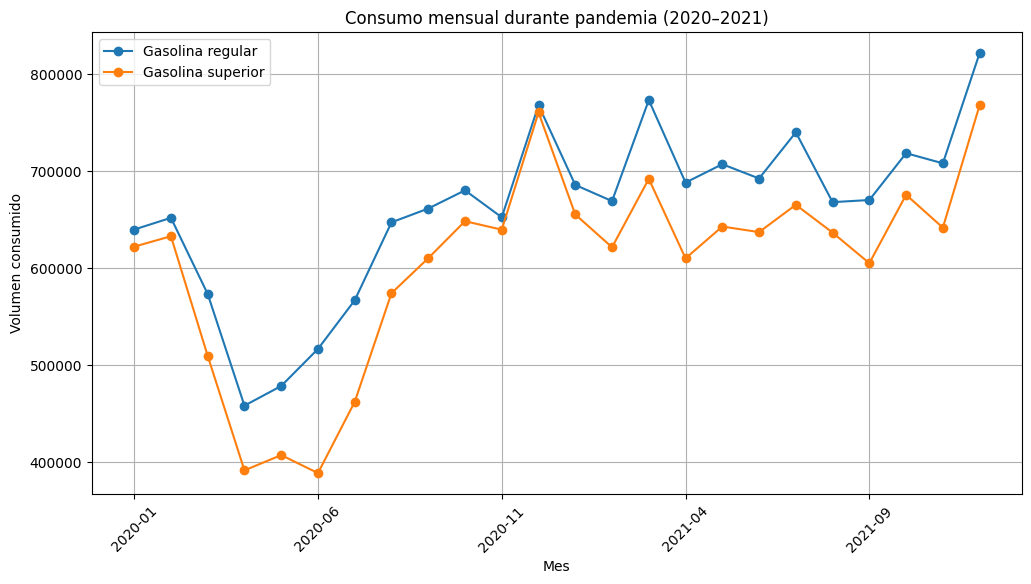

In [15]:
consumos["Mes_nombre"] = consumos["Fecha"].dt.strftime('%b')

pandemia = consumos[consumos["Año"].isin([2020, 2021])]

pandemia["Año_Mes"] = pandemia["Fecha"].dt.to_period("M").astype(str)

mensual_pandemia = pandemia.groupby("Año_Mes")[["Gasolina regular", "Gasolina superior"]].sum()

mensual_pandemia.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Consumo mensual durante pandemia (2020–2021)")
plt.xlabel("Mes")
plt.ylabel("Volumen consumido")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El consumo de gasolina durante la pandemia muestra un comportamiento distinto comparado con las importaciones, ya que el consumo de gasolina se ve afectado desde el mes de Marzo y sigue bajando hasta el mes de Mayo. La recuperación del consumo de gasolina es mucho más lenta que las importaciones, ya que el consumo se normaliza 6 meses despues de su punto más bajo. 

# Análisis de Series de Tiempo

### Importación

#### **Gasolina Regular**

In [16]:
gasolina_regulari = importaciones[["Fecha", "Gasolina regular"]]
gasolina_regulari.set_index("Fecha", inplace=True)

print("Importaciones:")
print("Inicio:", gasolina_regulari.index.min())
print("Fin:", gasolina_regulari.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_regulari.index))


Importaciones:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


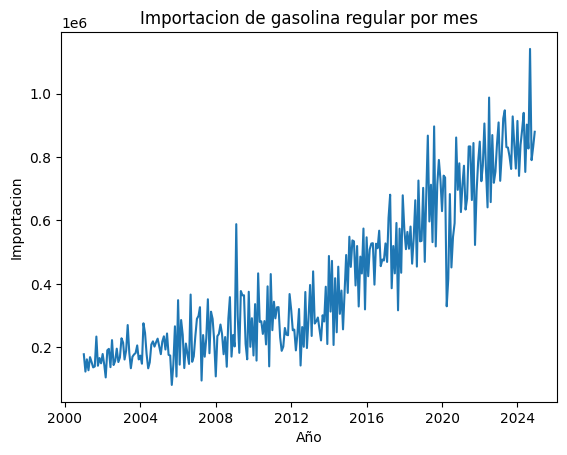

In [18]:
plt.plot(gasolina_regulari)
plt.gca().set(title="Importacion de gasolina regular por mes", xlabel="Año", ylabel="Importacion")
plt.show()

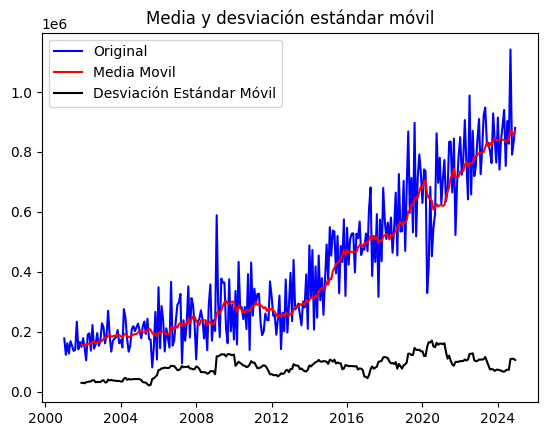

In [20]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilir = gasolina_regulari.rolling(window=12).mean()
deMovilir = gasolina_regulari.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(gasolina_regulari, color="blue", label="Original")
media = plt.plot(mediaMovilir, color='red', label = 'Media Movil')
ds = plt.plot(deMovilir,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la seria no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

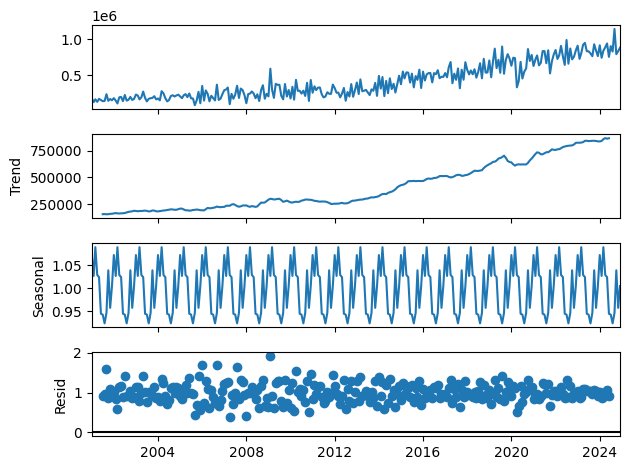

In [21]:
resultir = seasonal_decompose(gasolina_regulari, model='multiplicative')
resultir.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- No parece ser estacionaria en varianza.
- Hay estacionalidad clara.

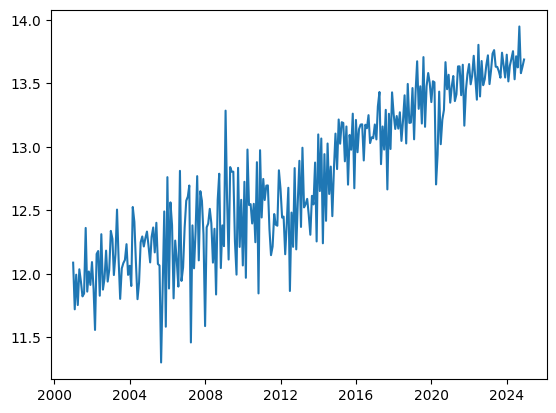

In [22]:
# Estimar parámetros para el modelo
ts_logir = np.log(gasolina_regulari)
plt.plot(ts_logir)

Aplicando el logaritmo se pudo estacionalizar la serie en varianza. 

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [23]:
print('Resultados del Test de Dickey Fuller')
dfTestir = adfuller(gasolina_regulari, autolag='AIC')
salidaDfir = pd.Series(dfTestir[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestir[4].items():
        salidaDfir['Critical Value (%s)'%key] = value
print(salidaDfir)

Resultados del Test de Dickey Fuller
Estadístico de prueba          0.830167
p-value                        0.992108
# de retardos usados           9.000000
# de observaciones usadas    278.000000
Critical Value (1%)           -3.454094
Critical Value (5%)           -2.871993
Critical Value (10%)          -2.572340
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [24]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_regulari_diff = gasolina_regulari.diff()
gasolina_regulari_diff.dropna(inplace=True)
dfTestir = adfuller(gasolina_regulari_diff)
salidaDfir = pd.Series(dfTestir[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestir[4].items():
        salidaDfir['Critical Value (%s)'%key] = value
print(salidaDfir)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -1.021694e+01
p-value                      5.450377e-18
# de retardos usados         8.000000e+00
# de observaciones usadas    2.780000e+02
Critical Value (1%)         -3.454094e+00
Critical Value (5%)         -2.871993e+00
Critical Value (10%)        -2.572340e+00
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

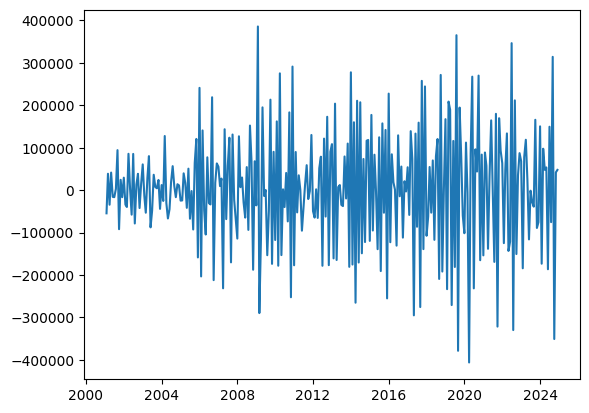

In [26]:
plt.plot(gasolina_regulari_diff)

Luego se grafica con las transformaciones realizadas, una transformación logarítmica y una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

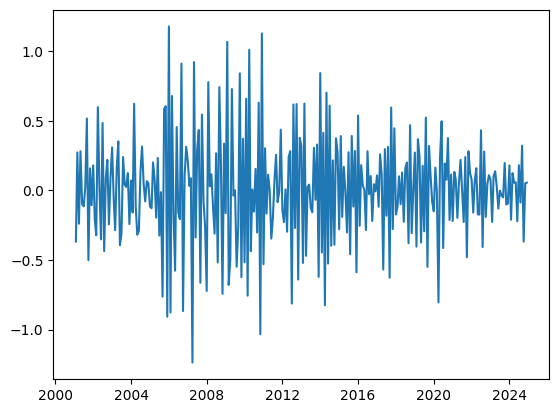

In [27]:
plt.plot(ts_logir.diff())

Para encontrar p y q. 

In [28]:
ts_logir_diff = ts_logir.diff()
ts_logir_diff.dropna(inplace = True)
tsa_acfir = acf(ts_logir_diff,nlags=5,fft=False)
tsa_pacfir = pacf(ts_logir_diff, nlags=36)
tsa_acfir

array([ 1.        , -0.63966623,  0.22911711, -0.1405702 ,  0.05703576,
        0.03591098])

In [29]:
tsa_pacfir

array([ 1.00000000e+00, -6.41902825e-01, -3.08378209e-01, -2.74842446e-01,
       -2.55190438e-01, -1.04414784e-01, -4.87827218e-02, -2.49476378e-01,
       -1.10623363e-01, -1.97833156e-01, -1.30457232e-01, -7.20095422e-02,
        2.07260011e-02, -1.70872739e-01, -9.89847868e-02, -6.55350190e-02,
        9.39243570e-03,  9.90239468e-02, -1.52959259e-01, -1.51328189e-01,
       -3.87468688e-02, -4.03854674e-02,  3.29042316e-03, -4.75916502e-02,
       -9.53080899e-02, -1.23381030e-01, -2.41499327e-02, -3.36223088e-06,
        4.88025780e-02, -2.89457067e-02,  9.77574240e-02, -6.45291839e-02,
        1.82195668e-02,  2.81517348e-02, -2.40473435e-01,  1.48679387e-01,
        2.27077613e-02])

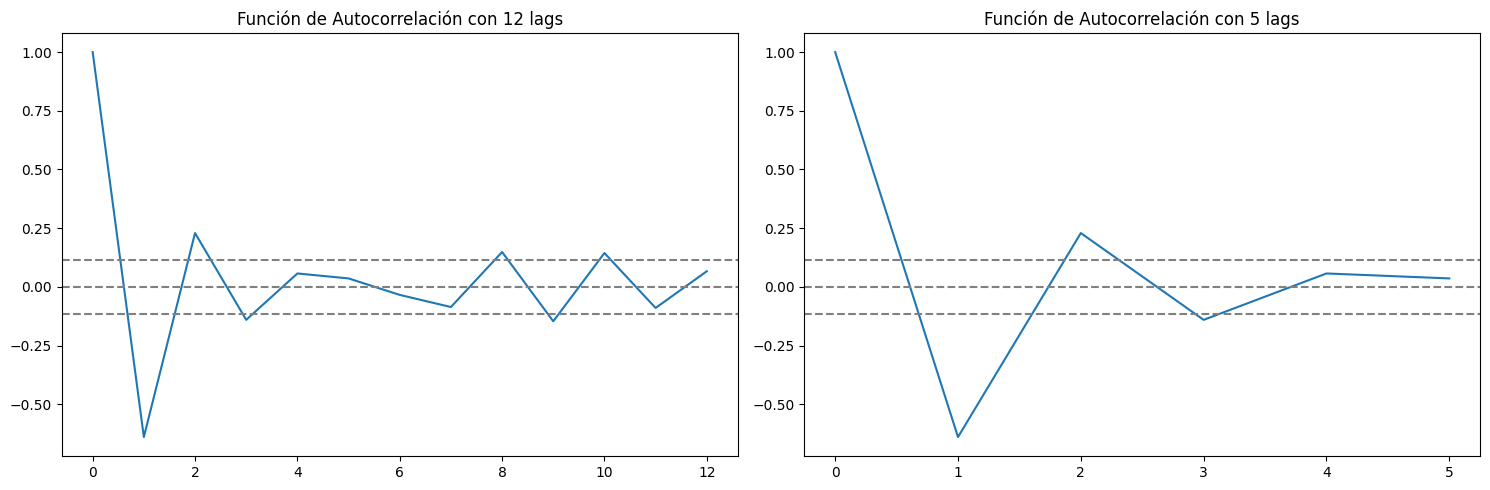

In [30]:

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(ts_logir_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(ts_logir_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

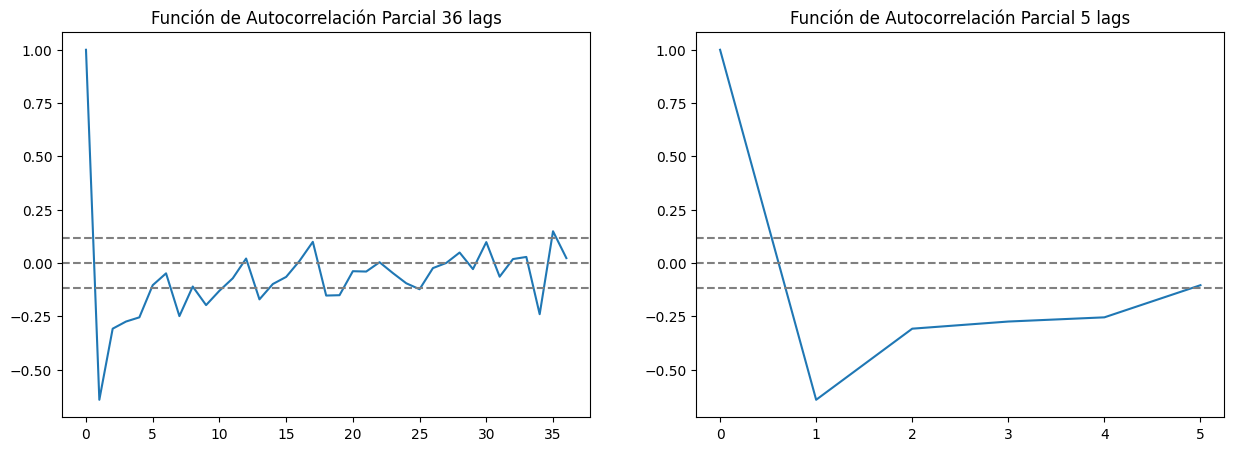

In [40]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(ts_logir_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(ts_logir_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARMA. 

Pobraremos modelos con:
- p=2, q=2
- p=2, q=3

Y con d=1

Vemos la estacionalidad en la serie

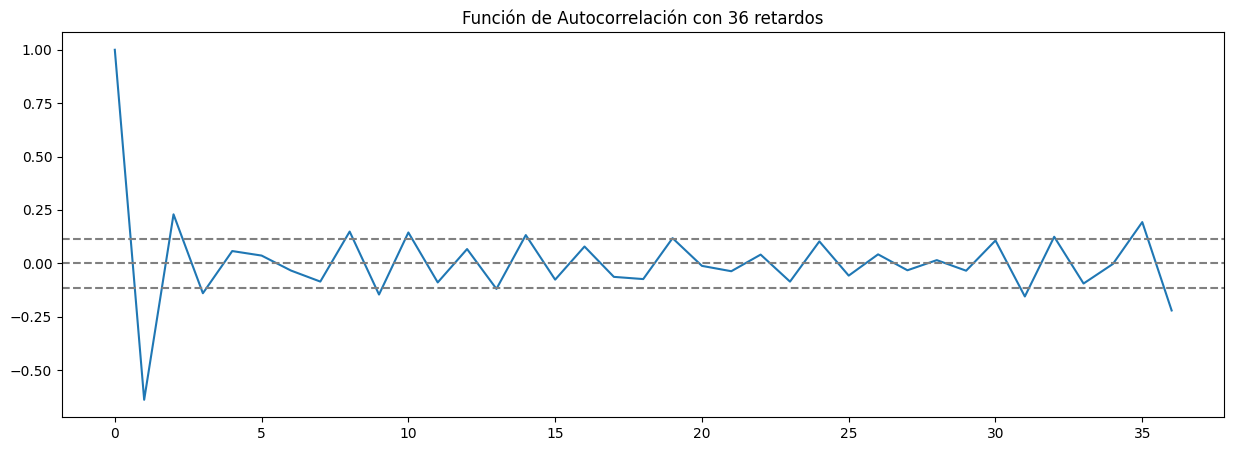

In [41]:
plt.plot(acf(ts_logir_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_logir_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

No se puede observar un comportamiento similar cada 12 meses, lo que indica que no hay estacionalidad. 

In [42]:
modelo122ir = ARIMA(ts_logir, order=(2, 1, 2))
resultado_m122ir = modelo122ir.fit()
print(resultado_m122ir.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6290      0.699     -0.900      0.368      -1.999       0.741
ar.L2         -0.0297      0.213     -0.140      0.889      -0.447       0.388
ma.L1         -0.4352      0.696     -0.625      0.532      -1.800       0.929
ma.L2         -0.3396      0.560     -0.607      0.544      -1.436       0.757
sigma2         0.0674      0.005     13.905      0.000       0.058       0.077


Análisis de residuos

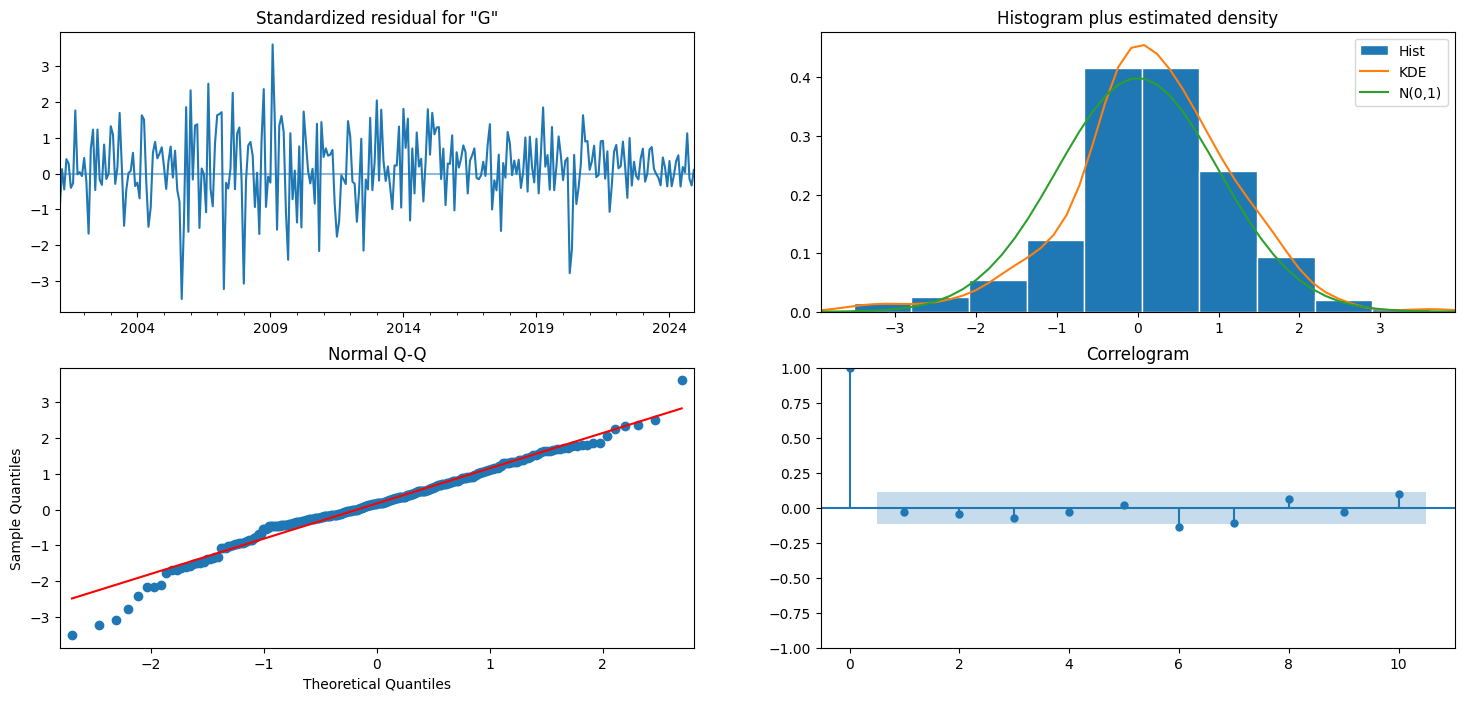

In [43]:
resultado_m122ir.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 


In [44]:
#Segundo modelo
modelo_123ir = ARIMA(ts_logir, order=(2, 1, 3))
resultado_m123ir = modelo_123ir.fit()
print(resultado_m123ir.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1180      0.130     -8.591      0.000      -1.373      -0.863
ar.L2         -0.7333      0.098     -7.449      0.000      -0.926      -0.540
ma.L1          0.1329      0.126      1.055      0.291      -0.114       0.380
ma.L2         -0.1034      0.107     -0.967      0.334      -0.313       0.106
ma.L3         -0.6520      0.083     -7.814      0.000      -0.816      -0.488
sigma2         0.0668      0.005     13.184      0.000       0.057       0.077


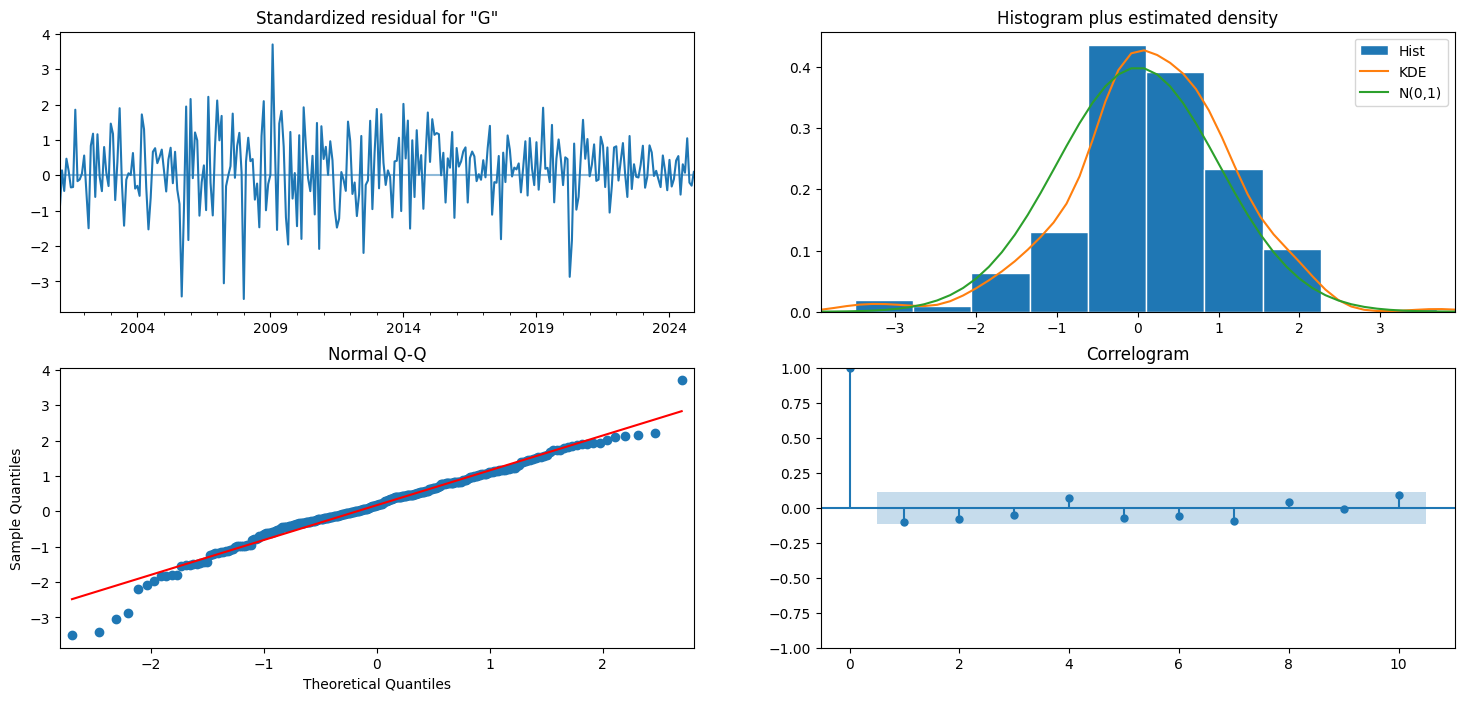

In [45]:
resultado_m123ir.plot_diagnostics(figsize=(18, 8))
plt.show()

En este otro modelo tampoco existen autocorrelaciones significativas y parecen estar distribuidos de forma normal

In [46]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 123=",resultado_m123ir.aic)
print("Modelo 122=",resultado_m122ir.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 123=",resultado_m123ir.bic)
print("Modelo 122=",resultado_m122ir.bic)

Resultados de AIC (Akaike information criterion)
Modelo 123= 51.63534356559967
Modelo 122= 51.842648424641446
Resultados de BIC (Bayesian information criterion)
Modelo 123= 73.5922368601574
Modelo 122= 70.14005950343955


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=2, q=2, d=1.

#### **Gasolina Superior**

In [51]:
gasolina_superi = importaciones[["Fecha", "Gasolina superior"]]
gasolina_superi.set_index("Fecha", inplace=True)

print("Consumos:")
print("Inicio:", gasolina_superi.index.min())
print("Fin:", gasolina_superi.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_superi.index))

Consumos:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


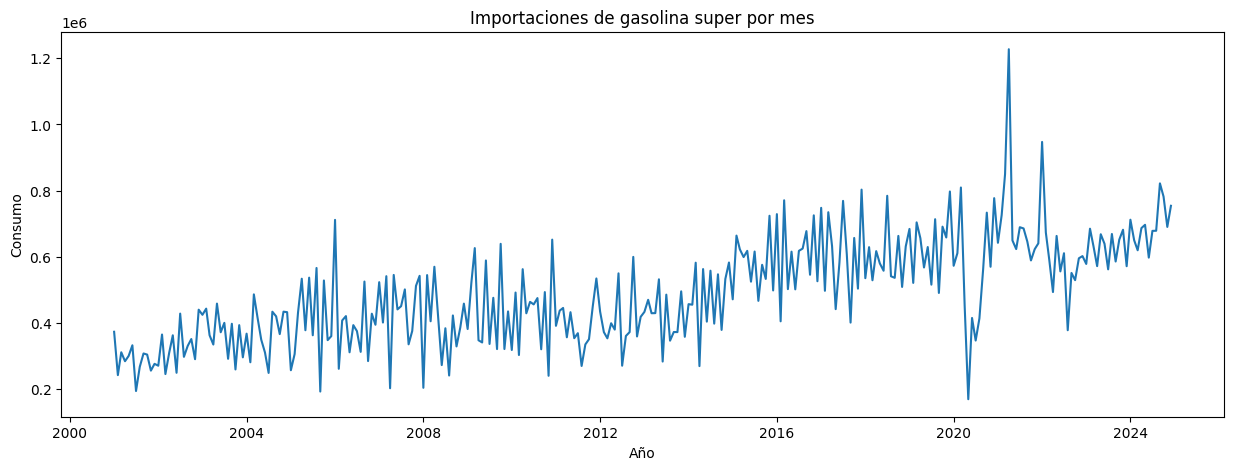

In [53]:
plt.plot(gasolina_superi)
plt.gca().set(title="Importaciones de gasolina super por mes", xlabel="Año", ylabel="Consumo")
plt.show()

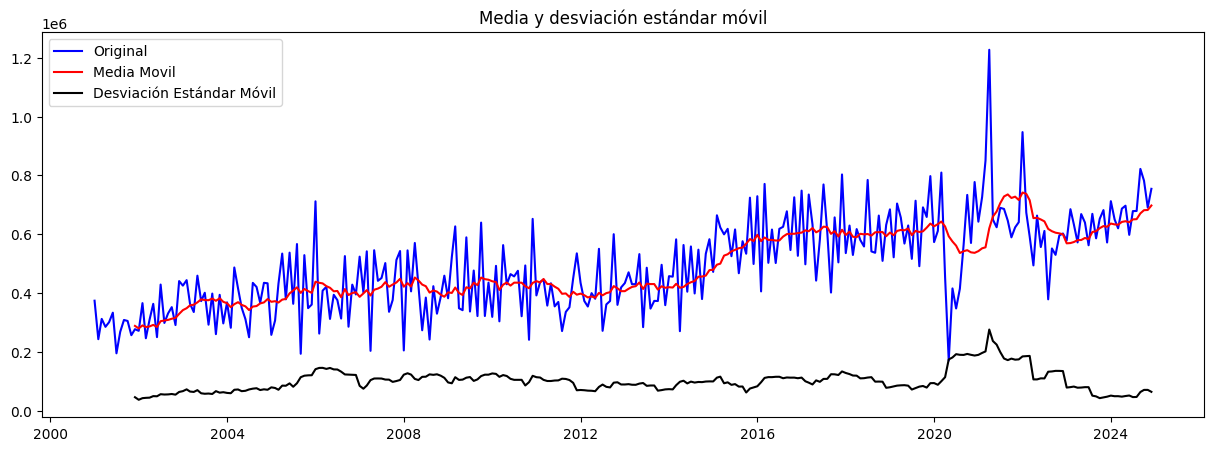

In [54]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilis = gasolina_superi.rolling(window=12).mean()
deMovilis = gasolina_superi.rolling(window=12).std()
# Se grafican los resultados.
originalis = plt.plot(gasolina_superi, color="blue", label="Original")
mediais = plt.plot(mediaMovilis, color='red', label = 'Media Movil')
dsis = plt.plot(deMovilis,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la serie no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

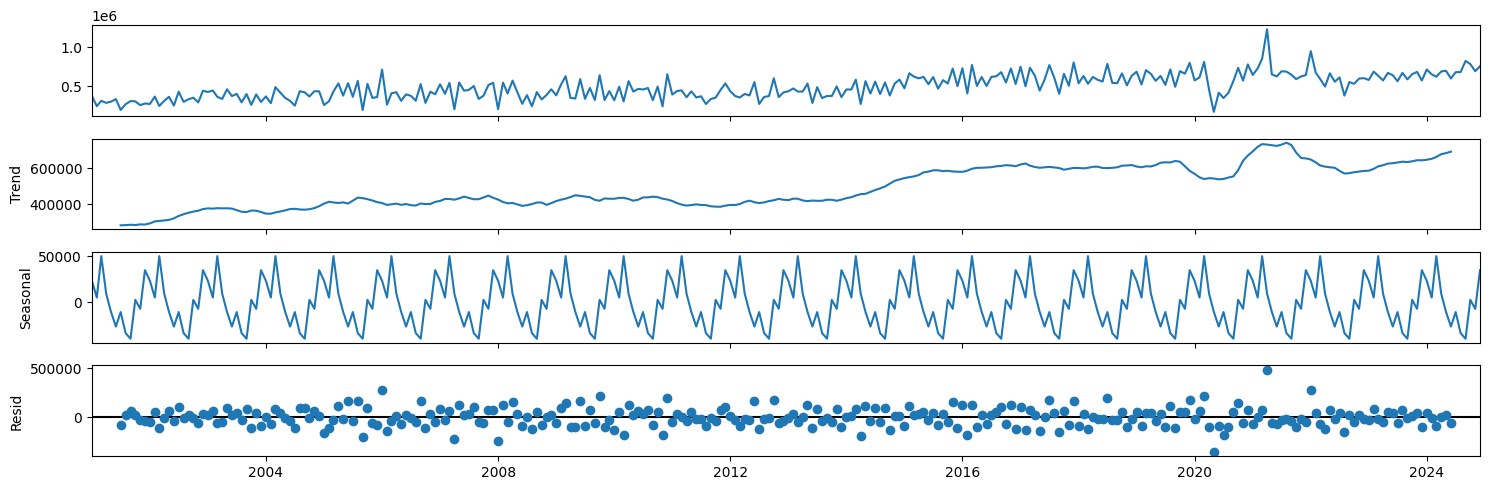

In [55]:
resultis = seasonal_decompose(gasolina_superi)
resultis.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- Sí parece ser estacionaria en varianza.
- Hay estacionalidad clara.

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [57]:
print('Resultados del Test de Dickey Fuller')
dfTestis = adfuller(gasolina_superi, autolag='AIC')
salidaDfis = pd.Series(dfTestis[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestis[4].items():
        salidaDfis['Critical Value (%s)'%key] = value
print(salidaDfis)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -1.601987
p-value                        0.482595
# de retardos usados           9.000000
# de observaciones usadas    278.000000
Critical Value (1%)           -3.454094
Critical Value (5%)           -2.871993
Critical Value (10%)          -2.572340
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [58]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_superi_diff = gasolina_superi.diff()
gasolina_superi_diff.dropna(inplace=True)
dfTestis = adfuller(gasolina_superi_diff)
salidaDfis = pd.Series(dfTestis[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestis[4].items():
        salidaDfis['Critical Value (%s)'%key] = value
print(salidaDfis)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -7.787433e+00
p-value                      8.109091e-12
# de retardos usados         1.100000e+01
# de observaciones usadas    2.750000e+02
Critical Value (1%)         -3.454355e+00
Critical Value (5%)         -2.872108e+00
Critical Value (10%)        -2.572401e+00
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

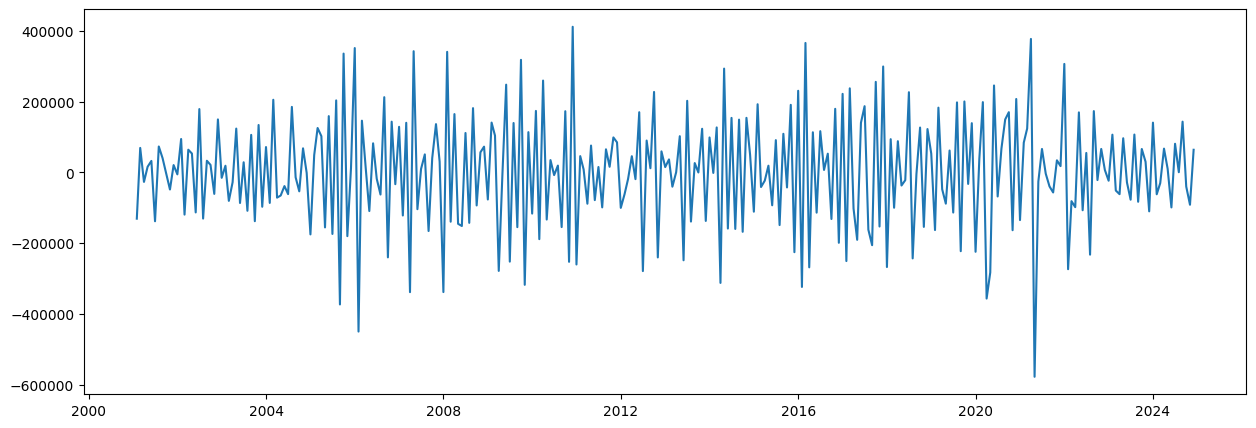

In [59]:
plt.plot(gasolina_superi_diff)

Luego se grafica con las transformaciones realizadas, una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

Para encontrar p y q:

In [62]:
tsa_acfis = acf(gasolina_superi_diff,nlags=5,fft=False)
tsa_pacfis = pacf(gasolina_superi_diff, nlags=36)
tsa_acfis

array([ 1.        , -0.64953808,  0.27337767, -0.1986567 ,  0.16772652,
       -0.13842297])

In [64]:
tsa_pacfis

array([ 1.00000000e+00, -6.51809191e-01, -2.60037325e-01, -2.68805793e-01,
       -1.03841685e-01, -1.20479535e-01, -1.74308340e-02, -8.26400665e-02,
       -1.41444344e-01, -1.21681373e-01, -7.98739564e-02, -1.72542408e-02,
       -1.38173797e-01, -7.22448520e-02, -2.10247134e-02, -1.11372826e-01,
       -6.36318606e-03,  5.76484546e-02, -2.92784664e-02, -6.63520295e-02,
       -9.56601613e-02, -1.30908580e-01, -7.38606394e-02, -4.47058044e-02,
       -7.51131662e-02, -8.13696270e-02, -6.41001790e-02, -5.76798554e-02,
        1.13396108e-01,  3.63530017e-02,  6.05792927e-02, -1.54424413e-01,
       -1.63475497e-01,  9.13581447e-05, -1.06055796e-02,  1.90150793e-02,
        1.68964187e-02])

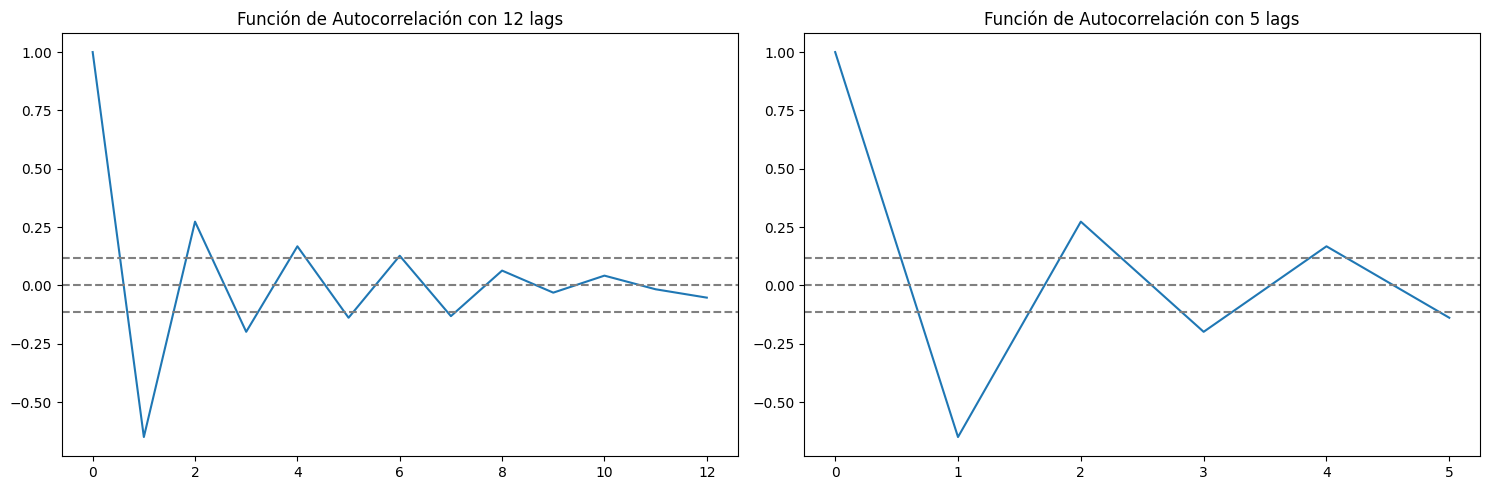

In [66]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(gasolina_superi_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(gasolina_superi_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

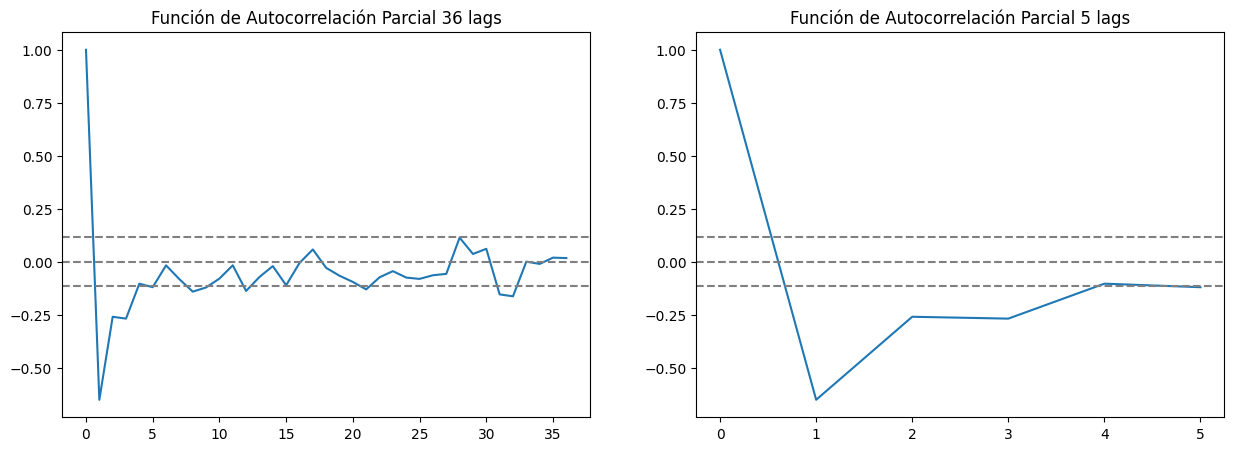

In [67]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(gasolina_superi_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(gasolina_superi_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARIMA. 

Pobraremos modelos con:
- p=2, q=3
- p=3, q=4

Y con d=1

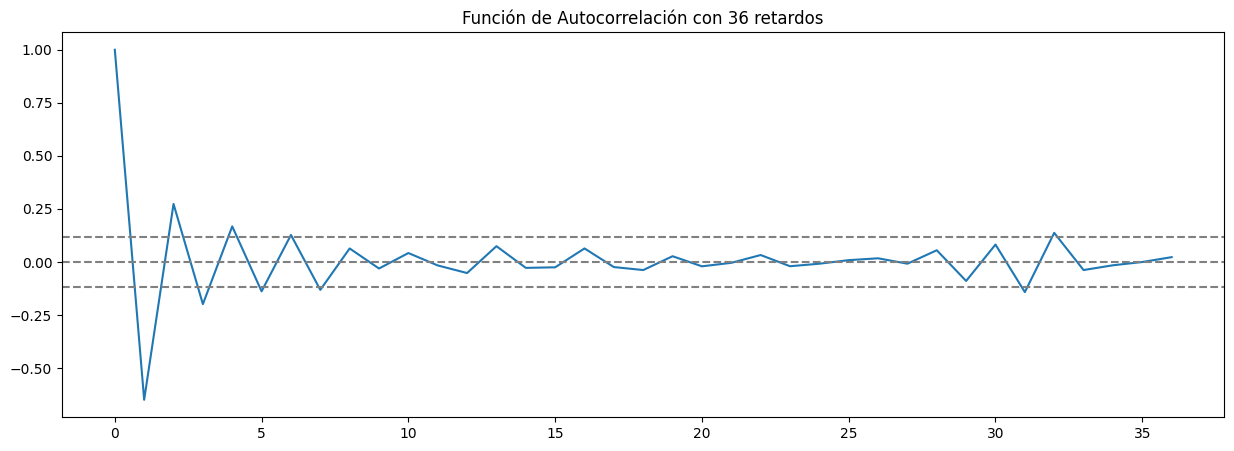

In [68]:
plt.plot(acf(gasolina_superi_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superi_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

No se puede observar un comportamiento similar cada 12 meses, lo que indica que no hay estacionalidad cada 12 meses.

In [70]:
modelo123is = ARIMA(gasolina_superi, order=(2, 1, 3))
resultado_m123is = modelo123is.fit()
print(resultado_m123is.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Local

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0102      0.299     -0.034      0.973      -0.596       0.575
ar.L2          0.5147      0.270      1.903      0.057      -0.015       1.045
ma.L1         -0.9528      0.324     -2.939      0.003      -1.588      -0.317
ma.L2         -0.2497      0.240     -1.041      0.298      -0.720       0.221
ma.L3          0.2584      0.244      1.058      0.290      -0.220       0.737
sigma2      1.239e+10   5.76e-11   2.15e+20      0.000    1.24e+10    1.24e+10


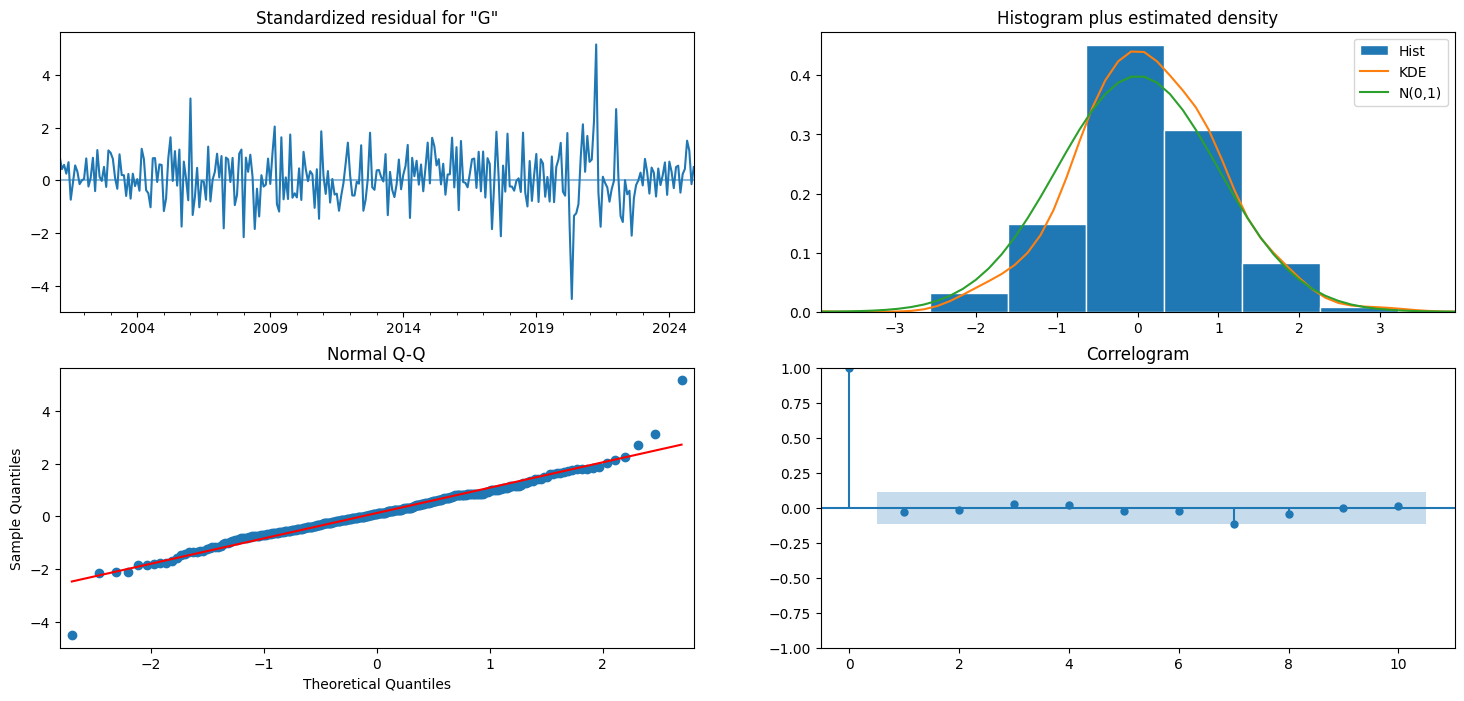

In [71]:
resultado_m123is.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [76]:
modelo134is = ARIMA(gasolina_superi, order=(3, 1, 4))
resultado_m134is = modelo134is.fit()
print(resultado_m134is.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.131      6.483      0.000       0.591       1.104
ar.L2          0.3966      0.182      2.175      0.030       0.039       0.754
ar.L3         -0.7428      0.113     -6.582      0.000      -0.964      -0.522
ma.L1         -1.8460      0.146    -12.667      0.000      -2.132      -1.560
ma.L2          0.7251      0.326      2.224      0.026       0.086       1.364
ma.L3          0.7327      0.303      2.422      0.015       0.140       1.326
ma.L4         -0.5520      0.117     -4.720      0.000      -0.781      -0.323
sigma2      1.231e+10   1.27e-10   9.68e+19      0.000    1.23e+10    1.23e+10


C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


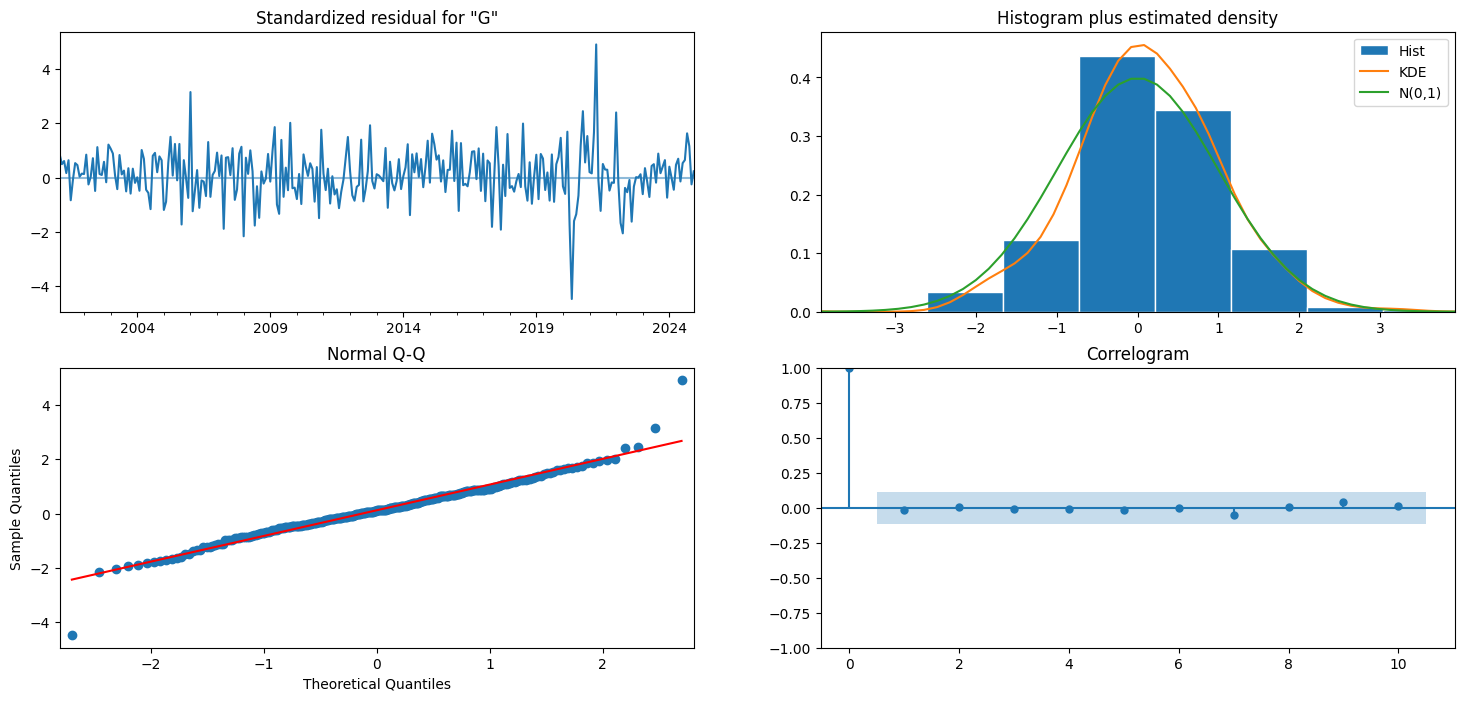

In [77]:
resultado_m134is.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [78]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 123=",resultado_m123is.aic)
print("Modelo 134=",resultado_m134is.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 123=",resultado_m123is.bic)
print("Modelo 134=",resultado_m134is.bic)

Resultados de AIC (Akaike information criterion)
Modelo 123= 7479.705773045525
Modelo 134= 7475.399015426707
Resultados de BIC (Bayesian information criterion)
Modelo 123= 7501.662666340083
Modelo 134= 7504.674873152783


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=3, q=4, d=1.

#### **Gasolina Diesel**

In [82]:
gasolina_dieseli = importaciones[["Fecha", "Diesel alto azufre"]]
gasolina_dieseli.set_index("Fecha", inplace=True)

print("Consumos:")
print("Inicio:", gasolina_dieseli.index.min())
print("Fin:", gasolina_dieseli.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_dieseli.index))

Consumos:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


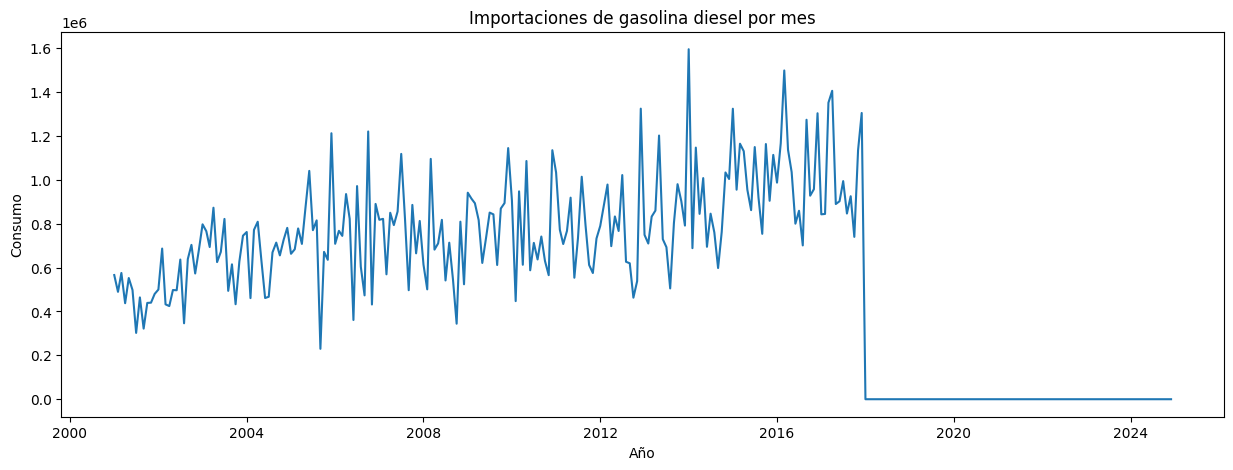

In [83]:
plt.plot(gasolina_dieseli)
plt.gca().set(title="Importaciones de gasolina diesel por mes", xlabel="Año", ylabel="Consumo")
plt.show()

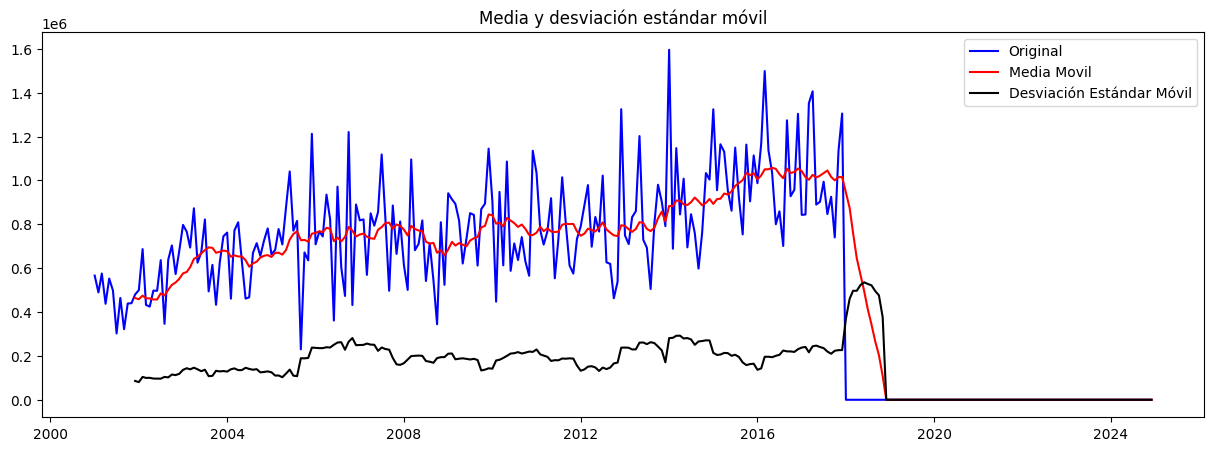

In [84]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilid = gasolina_dieseli.rolling(window=12).mean()
deMovilid = gasolina_dieseli.rolling(window=12).std()
# Se grafican los resultados.
originalid = plt.plot(gasolina_dieseli, color="blue", label="Original")
mediaid = plt.plot(mediaMovilid, color='red', label = 'Media Movil')
dsid = plt.plot(deMovilid,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente hasta el año 2017. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la seria no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

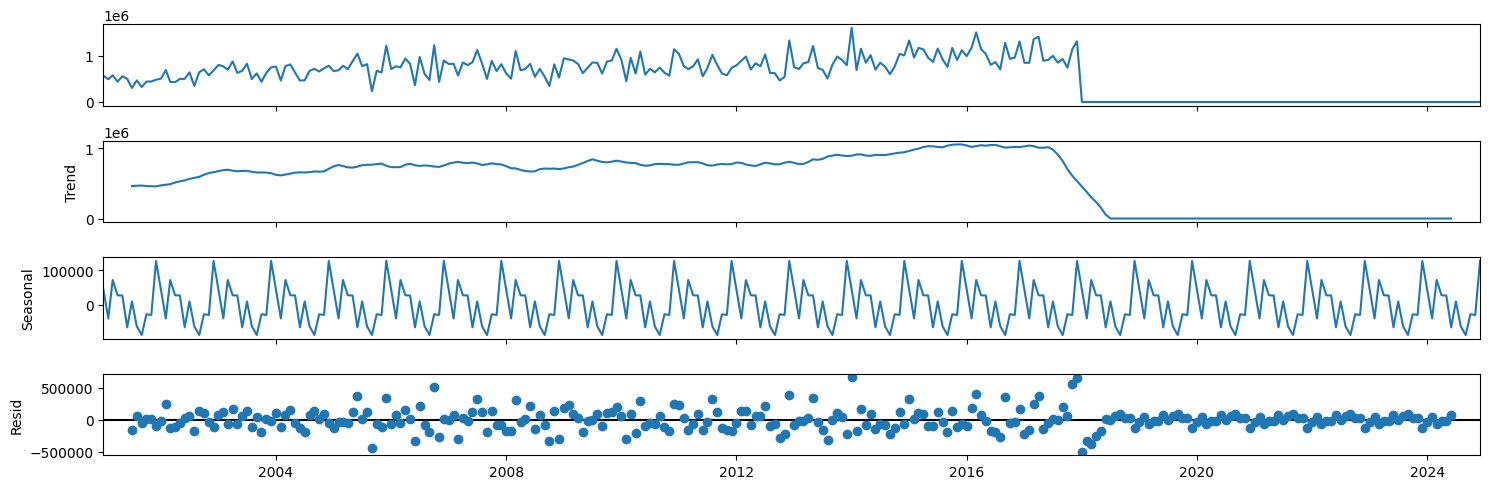

In [86]:
resultid = seasonal_decompose(gasolina_dieseli)
resultid.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- No parece ser estacionaria en varianza.
- Hay estacionalidad clara.

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [101]:
print('Resultados del Test de Dickey Fuller')
dfTestid = adfuller(gasolina_dieseli, autolag='AIC')
salidaDfid = pd.Series(dfTestid[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestid[4].items():
        salidaDfid['Critical Value (%s)'%key] = value
print(salidaDfid)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -1.389169
p-value                        0.587457
# de retardos usados           4.000000
# de observaciones usadas    283.000000
Critical Value (1%)           -3.453670
Critical Value (5%)           -2.871808
Critical Value (10%)          -2.572241
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [102]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_dieseli_diff = gasolina_dieseli.diff()
gasolina_dieseli_diff.dropna(inplace=True)
dfTestid = adfuller(gasolina_dieseli_diff)
salidaDfid = pd.Series(dfTestid[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestid[4].items():
        salidaDfid['Critical Value (%s)'%key] = value
print(salidaDfid)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -1.327172e+01
p-value                      8.012429e-25
# de retardos usados         3.000000e+00
# de observaciones usadas    2.830000e+02
Critical Value (1%)         -3.453670e+00
Critical Value (5%)         -2.871808e+00
Critical Value (10%)        -2.572241e+00
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

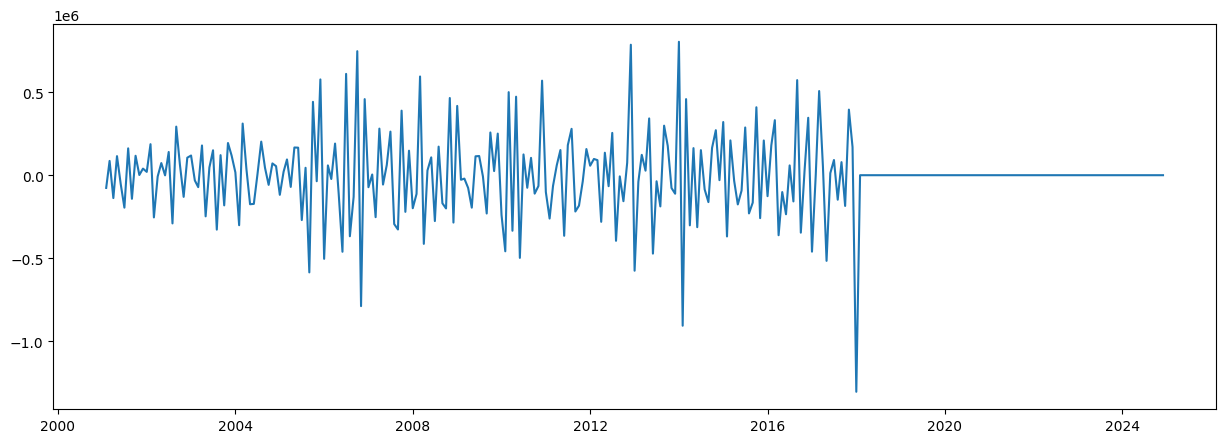

In [103]:
plt.plot(gasolina_dieseli_diff)

Luego se grafica con las transformaciones realizadas, una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

Para encontrar p y q

In [111]:
tsa_acfid = acf(gasolina_dieseli_diff,nlags=5,fft=False)
tsa_pacfid = pacf(gasolina_dieseli_diff, nlags=36)
tsa_acfid

array([ 1.        , -0.48480956,  0.02450102,  0.00161484, -0.05313479,
        0.0977817 ])

In [112]:
tsa_pacfid

array([ 1.        , -0.4865047 , -0.27775476, -0.16773894, -0.182551  ,
       -0.02881385, -0.07342427, -0.10883775, -0.07883244,  0.01731327,
        0.02384284, -0.09836268,  0.09009812, -0.02841794,  0.07471715,
        0.06397458,  0.07866829, -0.01278318, -0.06347111, -0.1237971 ,
        0.00654227,  0.02866789, -0.05728085, -0.02666388, -0.0252752 ,
        0.03898929,  0.09963135, -0.00964966,  0.00847835,  0.07320841,
        0.02305496, -0.03465028, -0.02681448, -0.03700397, -0.07860269,
       -0.06057075,  0.05387803])

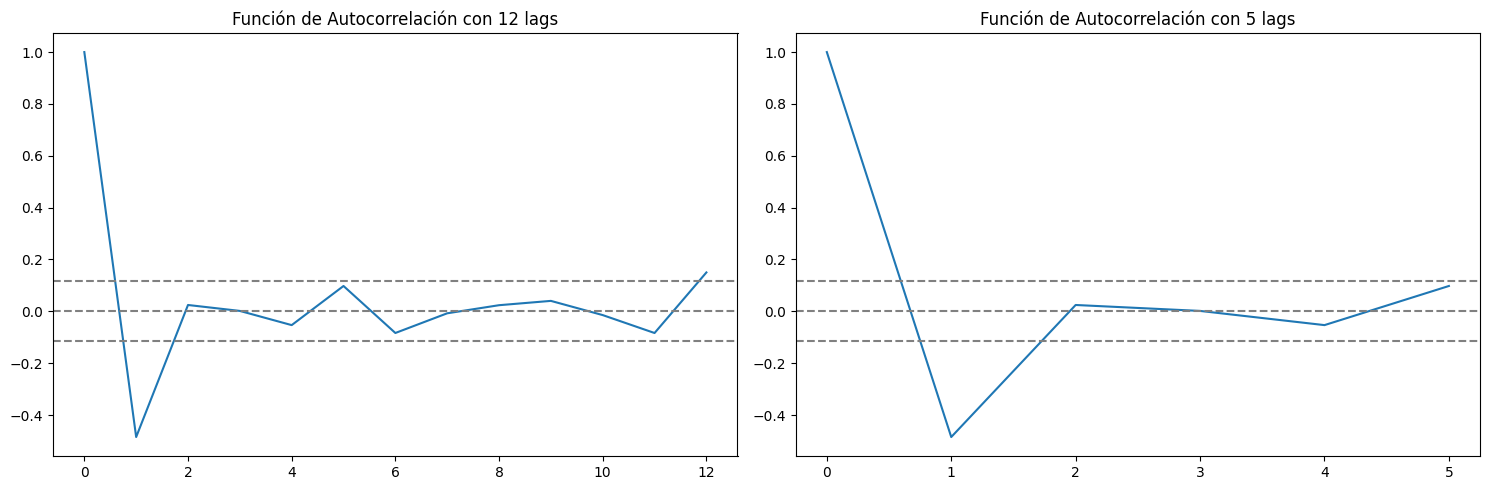

In [113]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(gasolina_dieseli_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(gasolina_dieseli_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

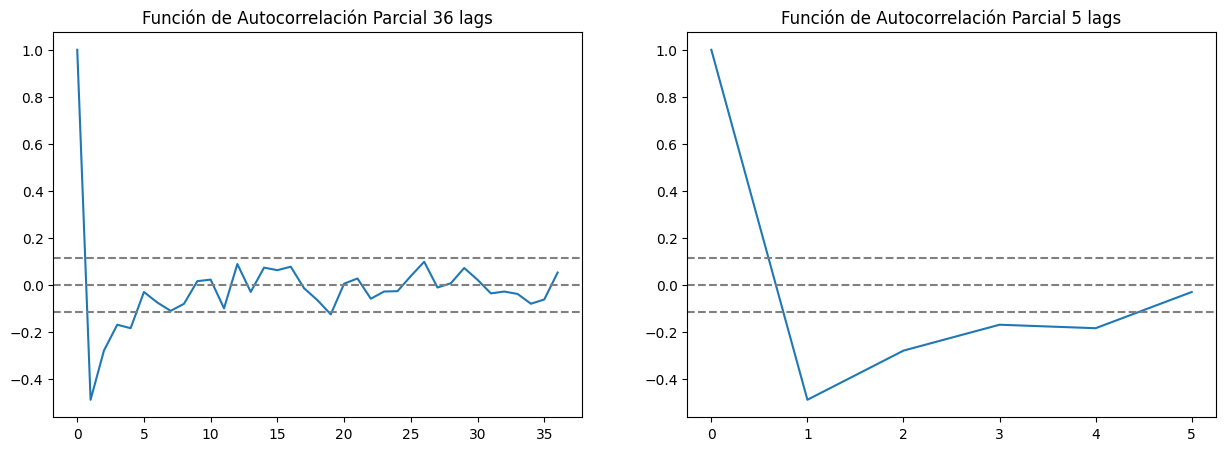

In [114]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(gasolina_dieseli_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(gasolina_dieseli_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARIMA. 

Pobraremos modelos con:
- p=2, q=4
- p=2, q=5

Y con d=1

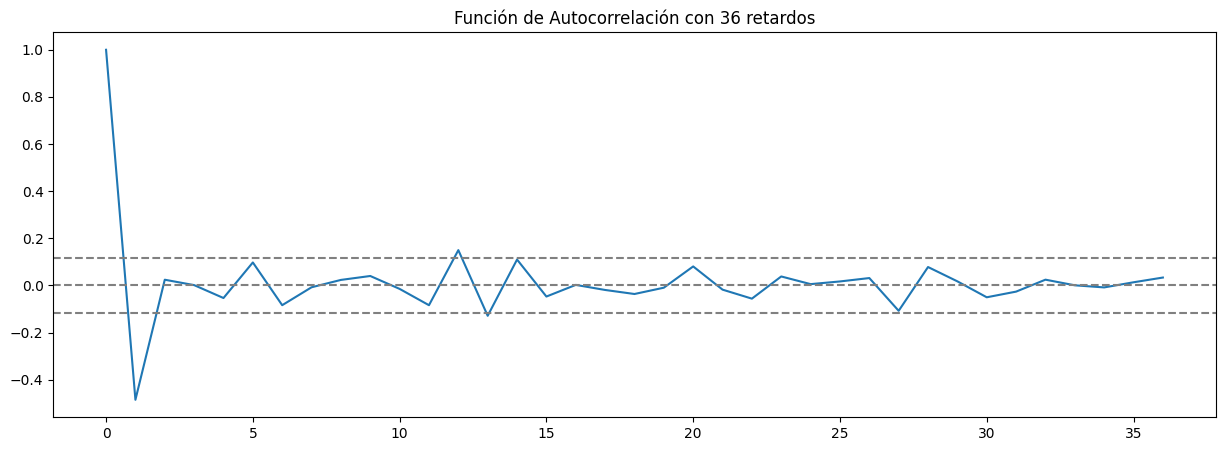

In [115]:
plt.plot(acf(gasolina_dieseli_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieseli_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

No se puede observar un comportamiento similar cada 12 meses, lo que indica que no hay estacionalidad cada 12 meses.

In [116]:
modelo124id = ARIMA(gasolina_dieseli, order=(2, 1, 4))
resultado_m124id = modelo124id.fit()
print(resultado_m124id.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4570      0.218     -2.101      0.036      -0.883      -0.031
ar.L2         -0.8261      0.147     -5.607      0.000      -1.115      -0.537
ma.L1         -0.2493      0.228     -1.091      0.275      -0.697       0.199
ma.L2          0.5439      0.174      3.127      0.002       0.203       0.885
ma.L3         -0.6380      0.086     -7.391      0.000      -0.807      -0.469
ma.L4          0.0204      0.077      0.264      0.792      -0.131       0.171
sigma2       4.07e+10   6.89e-12   5.91e+21      0.000    4.07e+10    4.07e+10


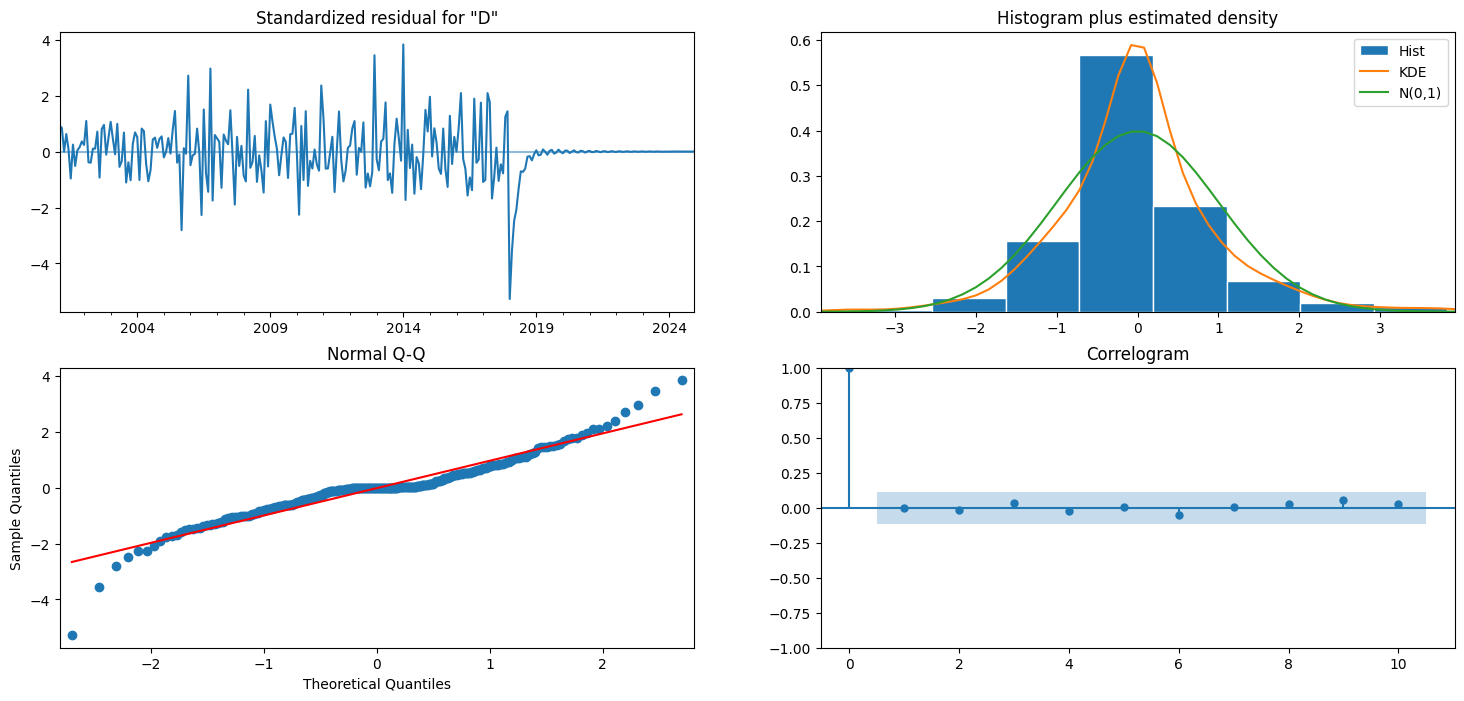

In [117]:
resultado_m124id.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [118]:
modelo125id = ARIMA(gasolina_dieseli, order=(2, 1, 5))
resultado_m125id = modelo125id.fit()
print(resultado_m125id.summary().tables[1])

C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nanum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5191      0.181     -2.872      0.004      -0.873      -0.165
ar.L2         -0.8118      0.185     -4.377      0.000      -1.175      -0.448
ma.L1         -0.1851      0.192     -0.964      0.335      -0.562       0.191
ma.L2          0.4727      0.201      2.352      0.019       0.079       0.867
ma.L3         -0.6127      0.143     -4.289      0.000      -0.893      -0.333
ma.L4         -0.0003      0.069     -0.004      0.997      -0.136       0.135
ma.L5          0.0262      0.070      0.375      0.707      -0.111       0.163
sigma2      4.091e+10   2.02e-12   2.02e+22      0.000    4.09e+10    4.09e+10


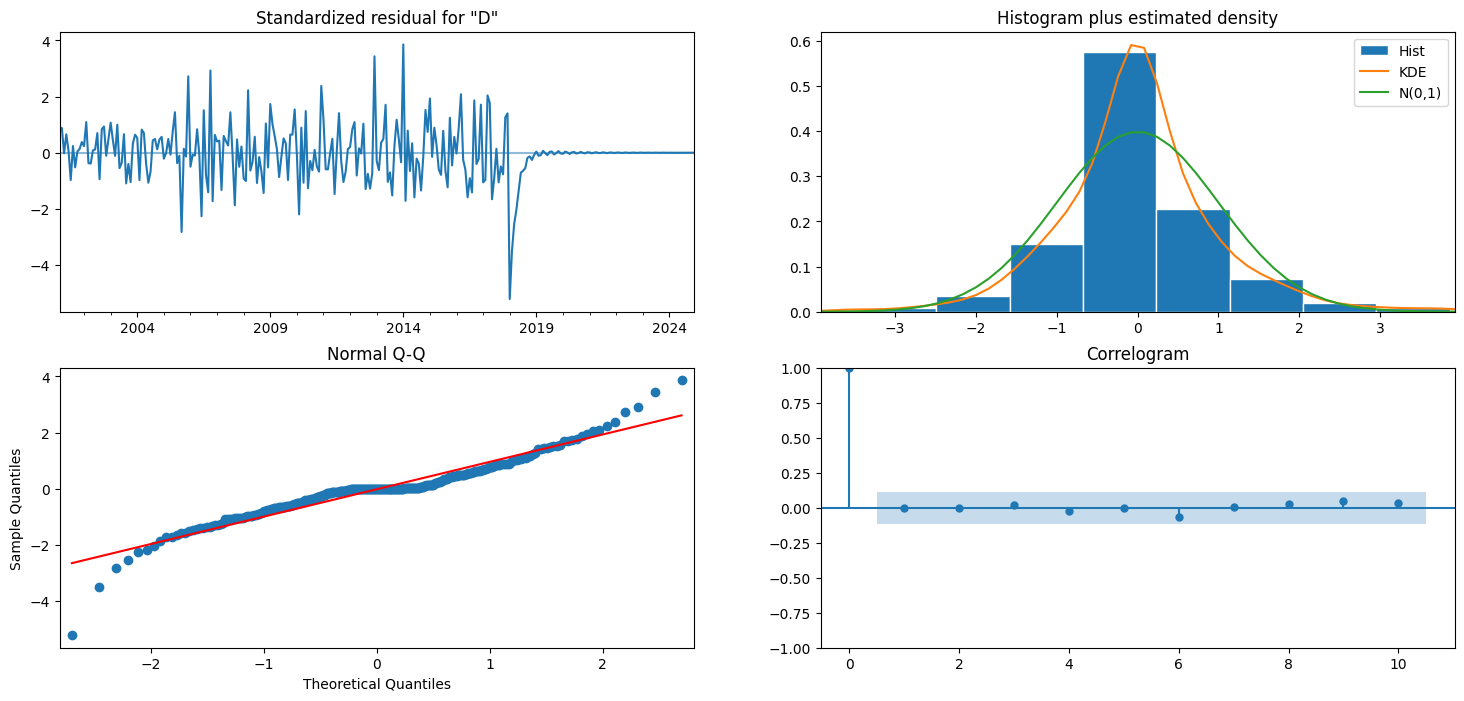

In [119]:
resultado_m125id.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [121]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 124=",resultado_m124id.aic)
print("Modelo 125=",resultado_m125id.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 124=",resultado_m124id.bic)
print("Modelo 125=",resultado_m125id.bic)

Resultados de AIC (Akaike information criterion)
Modelo 124= 7827.670036002606
Modelo 125= 7829.585133742017
Resultados de BIC (Bayesian information criterion)
Modelo 124= 7853.286411512923
Modelo 125= 7858.860991468094


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=2, q=4, d=1.

## **Consumo**

#### **Gasolina Regular**

In [5]:
gasolina_regularc = consumos[["Fecha", "Gasolina regular"]]
gasolina_regularc.set_index("Fecha", inplace=True)

print("Consumos:")
print("Inicio:", gasolina_regularc.index.min())
print("Fin:", gasolina_regularc.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_regularc.index))

Consumos:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


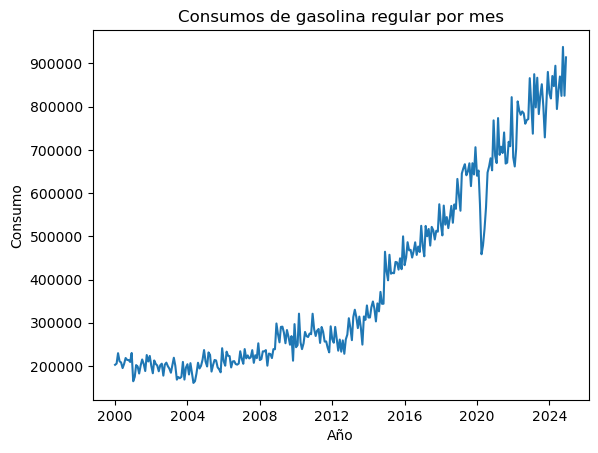

In [6]:
plt.plot(gasolina_regularc)
plt.gca().set(title="Consumos de gasolina regular por mes", xlabel="Año", ylabel="Consumo")
plt.show()

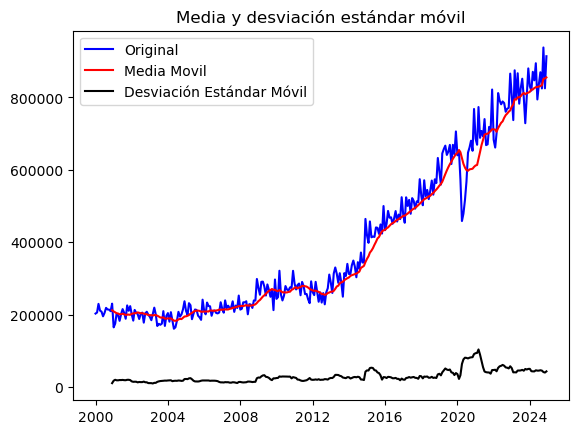

In [7]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilcr = gasolina_regularc.rolling(window=12).mean()
deMovilcr = gasolina_regularc.rolling(window=12).std()
# Se grafican los resultados.
originalcr = plt.plot(gasolina_regularc, color="blue", label="Original")
mediacr = plt.plot(mediaMovilcr, color='red', label = 'Media Movil')
dscr = plt.plot(deMovilcr,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la seria no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

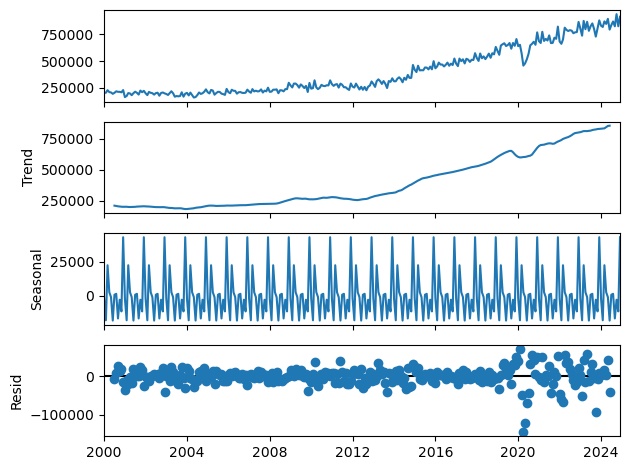

In [8]:
resultcr = seasonal_decompose(gasolina_regularc)
resultcr.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- No parece ser estacionaria en varianza.
- Hay estacionalidad clara.

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [9]:
print('Resultados del Test de Dickey Fuller')
dfTestcr = adfuller(gasolina_regularc, autolag='AIC')
salidaDfcr = pd.Series(dfTestcr[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcr[4].items():
        salidaDfcr['Critical Value (%s)'%key] = value
print(salidaDfcr)

Resultados del Test de Dickey Fuller
Estadístico de prueba          2.478789
p-value                        0.999043
# de retardos usados          14.000000
# de observaciones usadas    285.000000
Critical Value (1%)           -3.453505
Critical Value (5%)           -2.871735
Critical Value (10%)          -2.572202
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [10]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_regularc_diff = gasolina_regularc.diff()
gasolina_regularc_diff.dropna(inplace=True)
dfTestcr = adfuller(gasolina_regularc_diff)
salidaDfcr = pd.Series(dfTestcr[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcr[4].items():
        salidaDfcr['Critical Value (%s)'%key] = value
print(salidaDfcr)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -4.341663
p-value                        0.000376
# de retardos usados          16.000000
# de observaciones usadas    282.000000
Critical Value (1%)           -3.453754
Critical Value (5%)           -2.871844
Critical Value (10%)          -2.572261
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

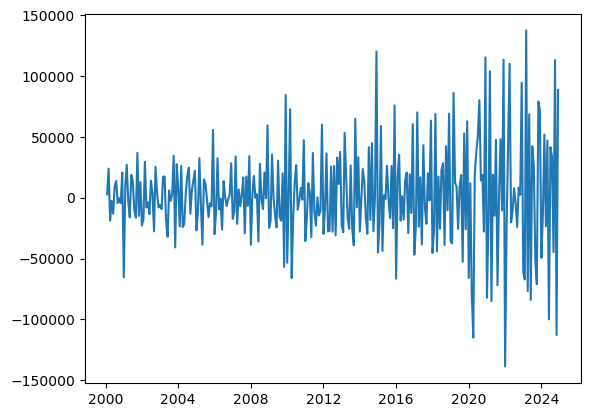

In [11]:
plt.plot(gasolina_regularc_diff)

Luego se grafica con las transformaciones realizadas, una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

Para encontrar p y q:

In [12]:
tsa_acf = acf(gasolina_regularc_diff,nlags=5,fft=False)
tsa_pacf = pacf(gasolina_regularc_diff, nlags=36)
tsa_acf

array([ 1.        , -0.43638452, -0.0319577 ,  0.04635958, -0.04872476,
        0.17149938])

In [13]:
tsa_pacf

array([ 1.        , -0.4378489 , -0.27698601, -0.12386487, -0.11835308,
        0.14416574, -0.22165209, -0.08594184, -0.10823041,  0.12252326,
       -0.02304063, -0.31213469,  0.12929789,  0.0319951 , -0.10408347,
       -0.00688126, -0.0570432 ,  0.21677116, -0.18134811, -0.01796636,
       -0.04349388,  0.10218053,  0.10586442, -0.02730429,  0.22766032,
        0.00145035, -0.07491034,  0.08916052,  0.06500712,  0.03344216,
        0.04983805,  0.02742929,  0.04218569, -0.01791299,  0.06418619,
       -0.0666109 ,  0.0983617 ])

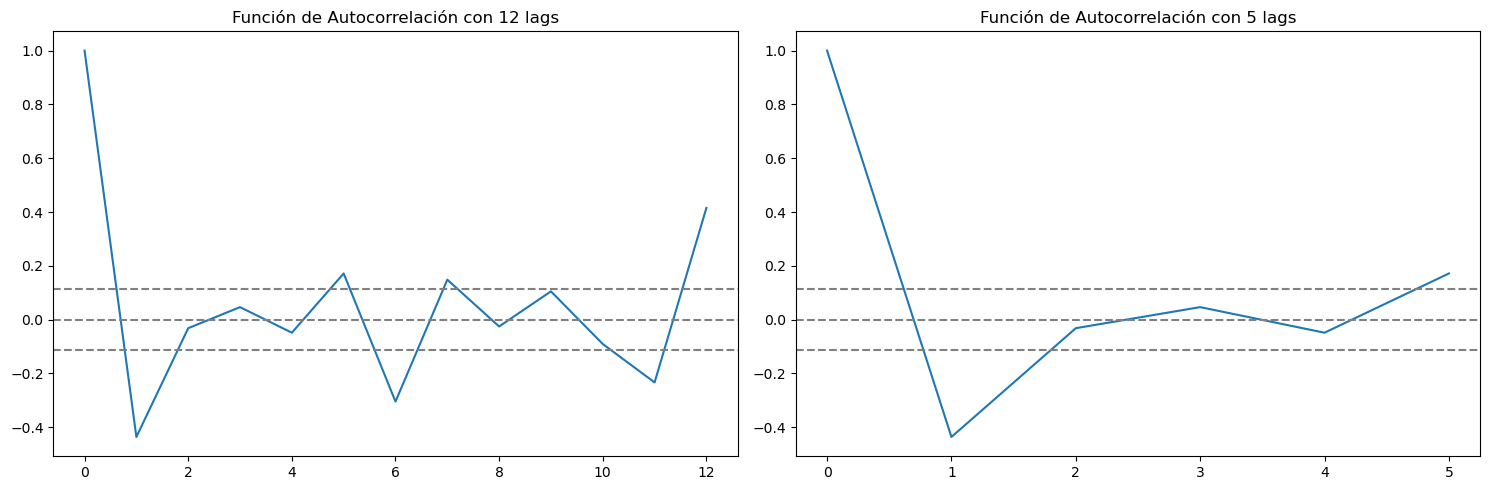

In [14]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(gasolina_regularc_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(gasolina_regularc_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

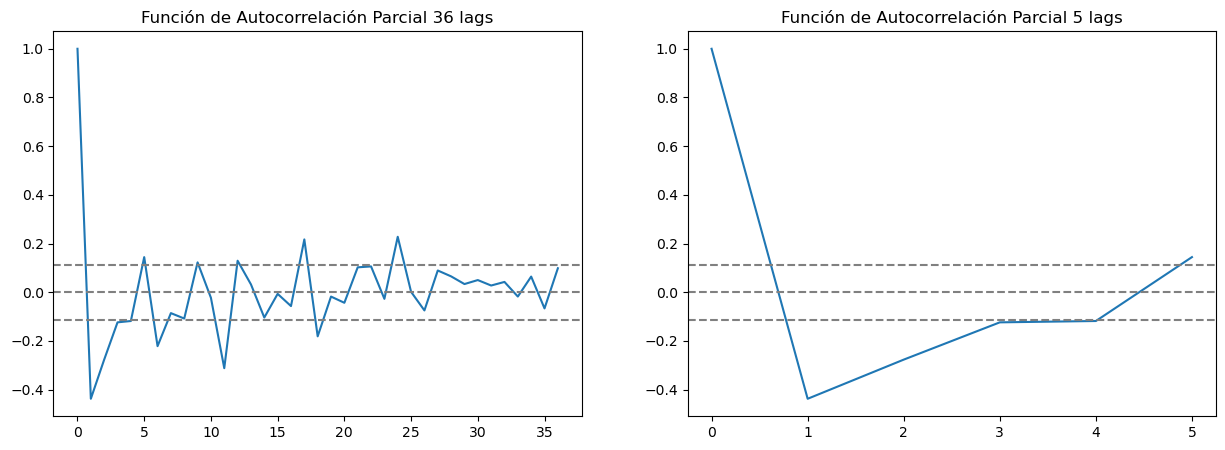

In [15]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(gasolina_regularc_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(gasolina_regularc_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARIMA. 

Pobraremos modelos con:
- p=1, q=2
- p=2, q=3

Y con d=1

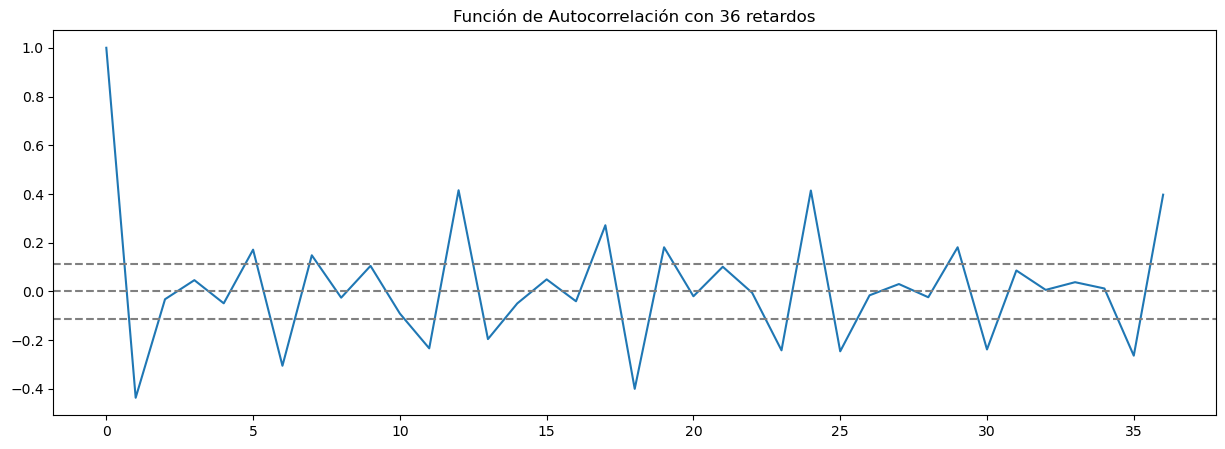

In [16]:
plt.plot(acf(gasolina_regularc_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_regularc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Si se puede observar un comportamiento similar cada 12 meses, lo que indica que hay estacionalidad cada 12 meses.

In [17]:
tscr = gasolina_regularc.diff(12)
tscr.dropna(inplace= True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 lags')

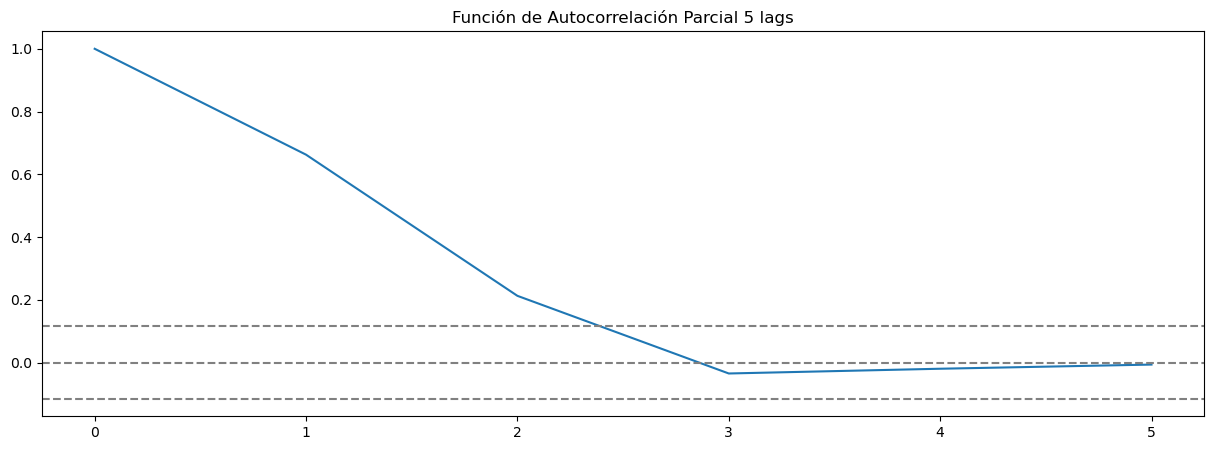

In [18]:
plt.plot(pacf(tscr, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tscr)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tscr)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

In [19]:
modelo112cr = SARIMAX(gasolina_regularc, order=(1, 1, 2), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m112cr = modelo112cr.fit()
print(resultado_m112cr.summary().tables[1])

c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7002      0.235      2.981      0.003       0.240       1.161
ma.L1         -1.1036      0.254     -4.348      0.000      -1.601      -0.606
ma.L2          0.1867      0.174      1.075      0.282      -0.154       0.527
ar.S.L12      -0.7421      0.076     -9.763      0.000      -0.891      -0.593
ar.S.L24      -0.3771      0.058     -6.509      0.000      -0.491      -0.264
sigma2      1.535e+09   2.58e-11   5.94e+19      0.000    1.53e+09    1.53e+09


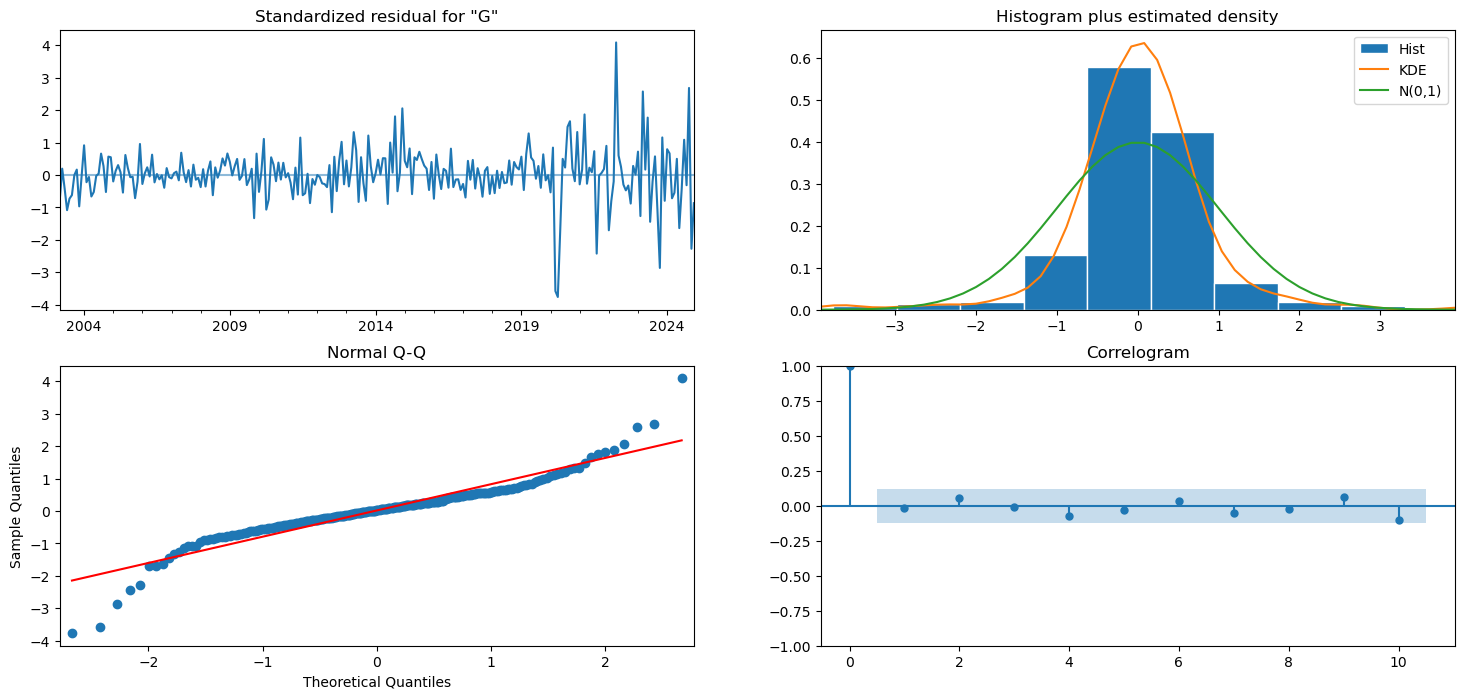

In [20]:
resultado_m112cr.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [21]:
modelo213cr = SARIMAX(gasolina_regularc, order=(2, 1, 3), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m213cr = modelo213cr.fit()
print(resultado_m213cr.summary().tables[1])

c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7129      0.887      0.804      0.422      -1.026       2.452
ar.L2         -0.1319      0.689     -0.191      0.848      -1.482       1.218
ma.L1         -1.1319      0.893     -1.267      0.205      -2.883       0.619
ma.L2          0.4119      1.044      0.394      0.693      -1.635       2.458
ma.L3         -0.1661      0.232     -0.715      0.475      -0.621       0.289
ar.S.L12      -0.7392      0.078     -9.525      0.000      -0.891      -0.587
ar.S.L24      -0.3824      0.065     -5.847      0.000      -0.511      -0.254
sigma2       1.55e+09   3.04e-09    5.1e+17      0.000    1.55e+09    1.55e+09


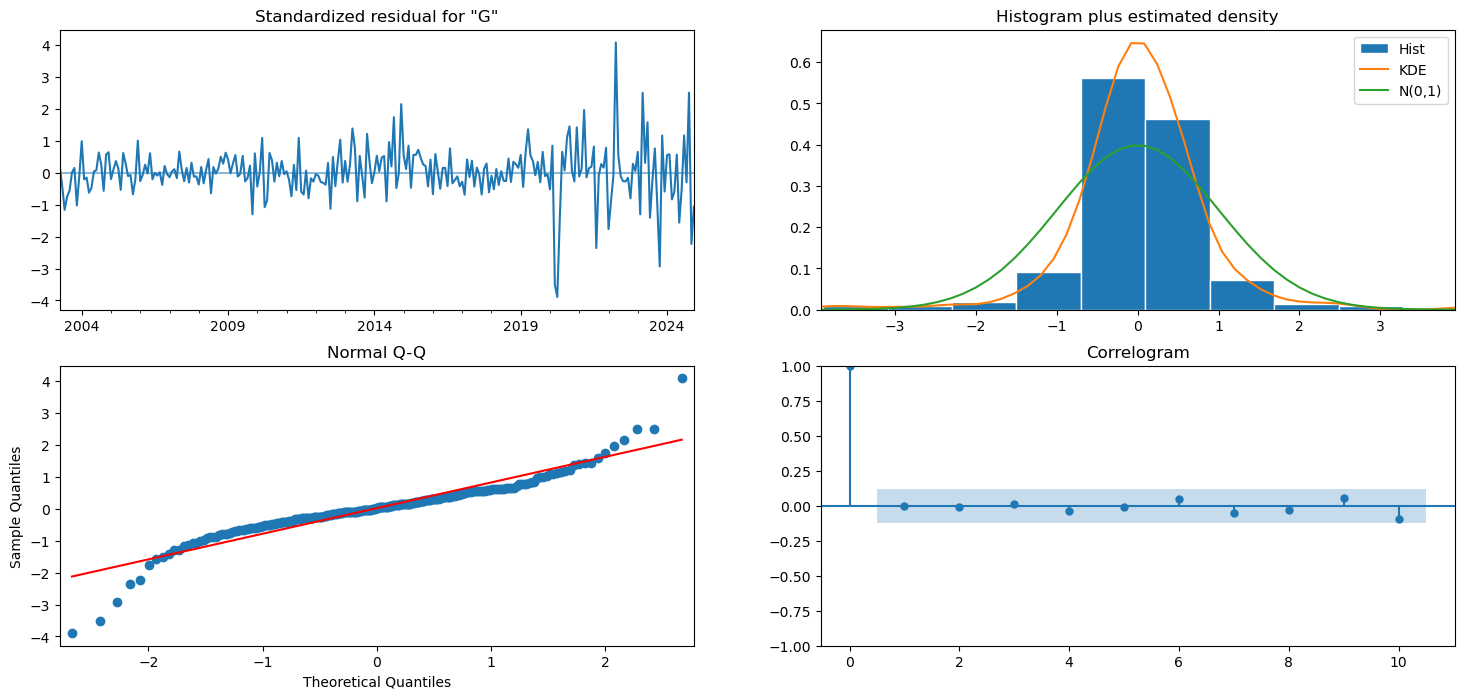

In [22]:
resultado_m213cr.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [23]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 112=",resultado_m112cr.aic)
print("Modelo 213=",resultado_m213cr.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 112=",resultado_m112cr.bic)
print("Modelo 213=",resultado_m213cr.bic)

Resultados de AIC (Akaike information criterion)
Modelo 112= 6207.282702795368
Modelo 213= 6187.315022961716
Resultados de BIC (Bayesian information criterion)
Modelo 112= 6228.692769817934
Modelo 213= 6215.831186220297


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=2, q=3, d=1.

In [24]:
traincr = gasolina_regularc[:'2021']
testcr = gasolina_regularc['2022':]   
traincr.index[0]

Timestamp('2000-01-01 00:00:00')

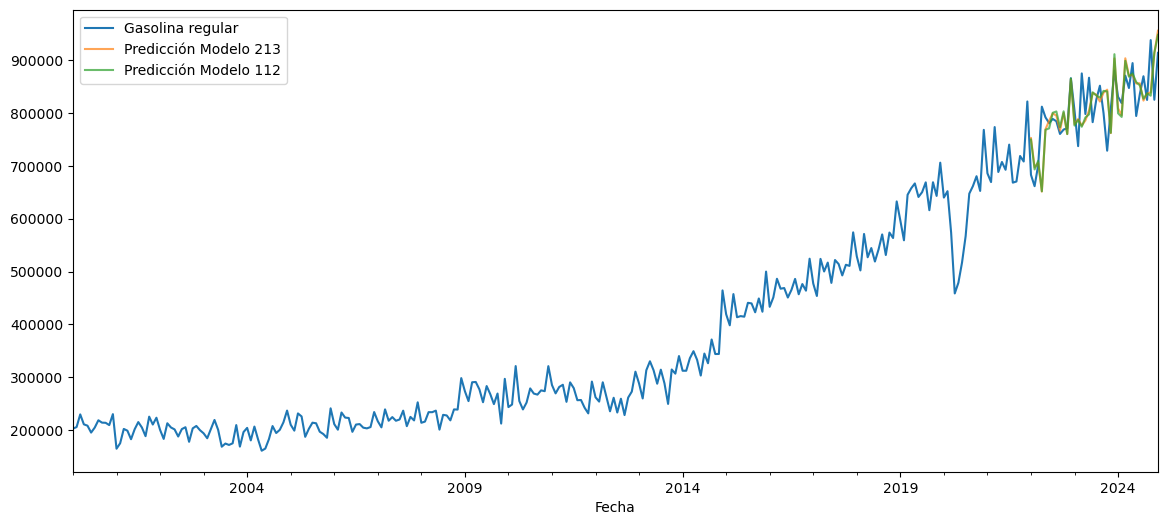

In [ ]:

pred1 = resultado_m213cr.get_prediction(start=testcr.index[0], end='2024-12-01', dynamic=False)
pred_ci1 = pred1.conf_int() 

pred2 = resultado_m112cr.get_prediction(start=testcr.index[0], end='2024-12-01', dynamic=False)
pred_ci2 = pred2.conf_int() 

ax = gasolina_regularc['2000':'2024'].plot(label='Observado', figsize=(14, 6))

pred1.predicted_mean.plot(ax=ax, label='Predicción Modelo 213', alpha=0.7)

pred2.predicted_mean.plot(ax=ax, label='Predicción Modelo 112', alpha=0.7)

plt.legend()
plt.show()


In [74]:

y_pred1 = pred1.predicted_mean  

y_pred2 = pred2.predicted_mean 

y_true = testcr 

mape1 = mean_absolute_percentage_error(y_true, y_pred1)
print(f'MAPE Modelo 1: {mape1 * 100:.2f}%')

mape2 = mean_absolute_percentage_error(y_true, y_pred2)
print(f'MAPE Modelo 2: {mape2 * 100:.2f}%')

if mape1 < mape2:
    print("El Modelo 213 tiene un mejor MAPE.")
else:
    print("El Modelo 112 tiene un mejor MAPE.")


MAPE Modelo 1: 100.00%
MAPE Modelo 2: 100.00%
El Modelo 213 tiene un mejor MAPE.


Como el modelo213 obtuvo un mejor MAPE se pudo verificar que este es el mejor modelo para predecir el consumo de gasolina regular de los ultimos 3 años (2022-2024)

#### **Gasolina Superior**

In [28]:
gasolina_superc = consumos[["Fecha", "Gasolina superior"]]
gasolina_superc.set_index("Fecha", inplace=True)

print("Consumos:")
print("Inicio:", gasolina_superc.index.min())
print("Fin:", gasolina_superc.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_superc.index))

Consumos:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


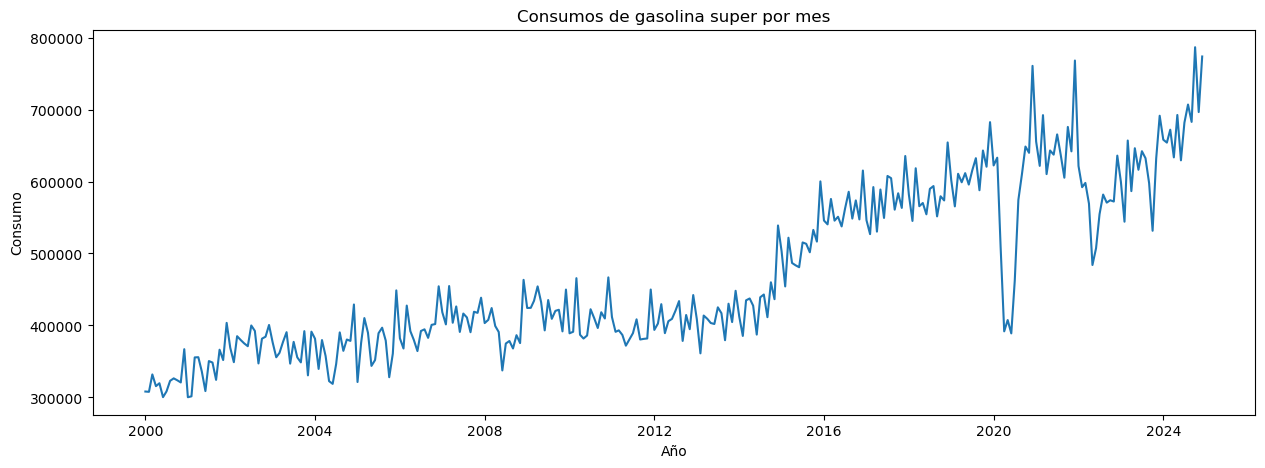

In [29]:
plt.plot(gasolina_superc)
plt.gca().set(title="Consumos de gasolina super por mes", xlabel="Año", ylabel="Consumo")
plt.show()

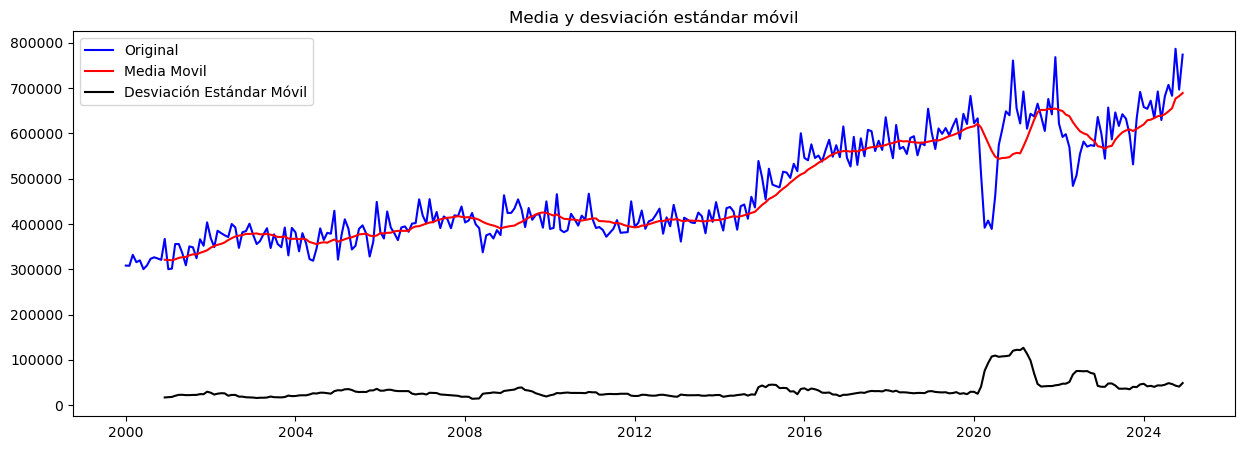

In [30]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilcs = gasolina_superc.rolling(window=12).mean()
deMovilcs = gasolina_superc.rolling(window=12).std()
# Se grafican los resultados.
originalcs = plt.plot(gasolina_superc, color="blue", label="Original")
mediacs = plt.plot(mediaMovilcs, color='red', label = 'Media Movil')
dscs = plt.plot(deMovilcs,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la serie no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

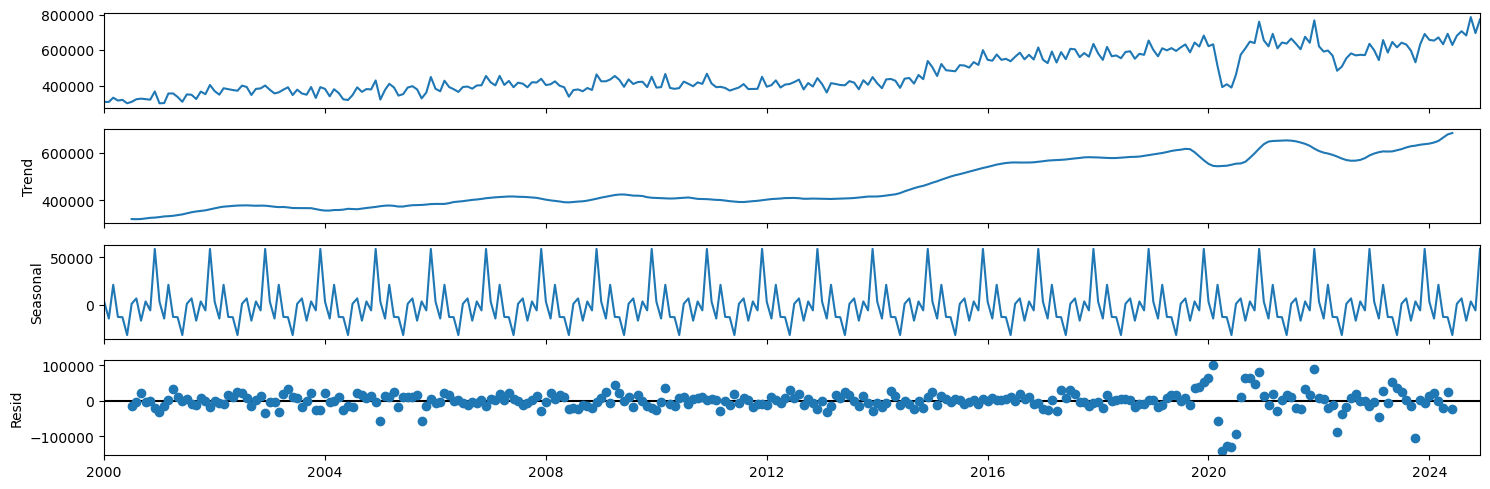

In [31]:
resultcs = seasonal_decompose(gasolina_superc)
resultcs.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- No parece ser estacionaria en varianza.
- Hay estacionalidad clara.

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [32]:
print('Resultados del Test de Dickey Fuller')
dfTestcs = adfuller(gasolina_superc, autolag='AIC')
salidaDfcs = pd.Series(dfTestcs[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcs[4].items():
        salidaDfcs['Critical Value (%s)'%key] = value
print(salidaDfcs)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -0.179772
p-value                        0.940890
# de retardos usados          12.000000
# de observaciones usadas    287.000000
Critical Value (1%)           -3.453342
Critical Value (5%)           -2.871664
Critical Value (10%)          -2.572164
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [33]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_superc_diff = gasolina_superc.diff()
gasolina_superc_diff.dropna(inplace=True)
dfTestcs = adfuller(gasolina_superc_diff)
salidaDfcs = pd.Series(dfTestcs[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcs[4].items():
        salidaDfcs['Critical Value (%s)'%key] = value
print(salidaDfcs)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -4.455130
p-value                        0.000237
# de retardos usados          16.000000
# de observaciones usadas    282.000000
Critical Value (1%)           -3.453754
Critical Value (5%)           -2.871844
Critical Value (10%)          -2.572261
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

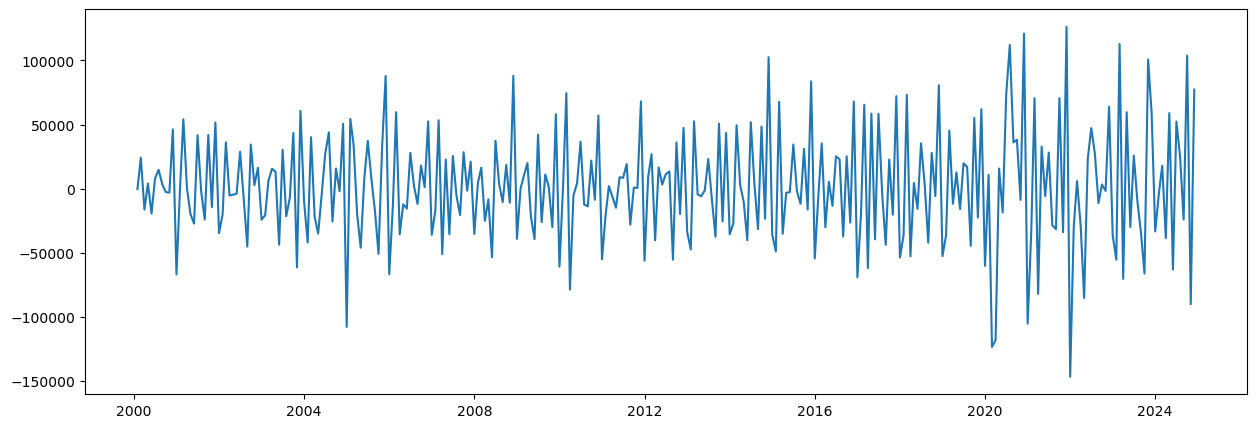

In [34]:
plt.plot(gasolina_superc_diff)

Luego se grafica con las transformaciones realizadas, una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

Para encontrar p y q:

In [35]:
tsa_acf = acf(gasolina_superc_diff,nlags=5,fft=False)
tsa_pacf = pacf(gasolina_superc_diff, nlags=36)
tsa_acf

array([ 1.        , -0.41004371,  0.01422188,  0.05281205, -0.07900805,
        0.17139471])

In [36]:
tsa_pacf

array([ 1.        , -0.41141969, -0.18652004, -0.02045493, -0.07415617,
        0.14597798, -0.35260785, -0.15887328, -0.12716627,  0.08461331,
        0.00444827, -0.3315937 ,  0.22781759,  0.01053109, -0.06682017,
       -0.02379356, -0.05361202,  0.17952633, -0.22037197, -0.00902206,
       -0.13693806, -0.01209595, -0.07280387, -0.08447241,  0.24283314,
        0.00208493,  0.07492766, -0.02340487, -0.03684364,  0.03795045,
       -0.02428377,  0.09216368,  0.04096844,  0.00525252, -0.04570062,
       -0.21319667,  0.12792346])

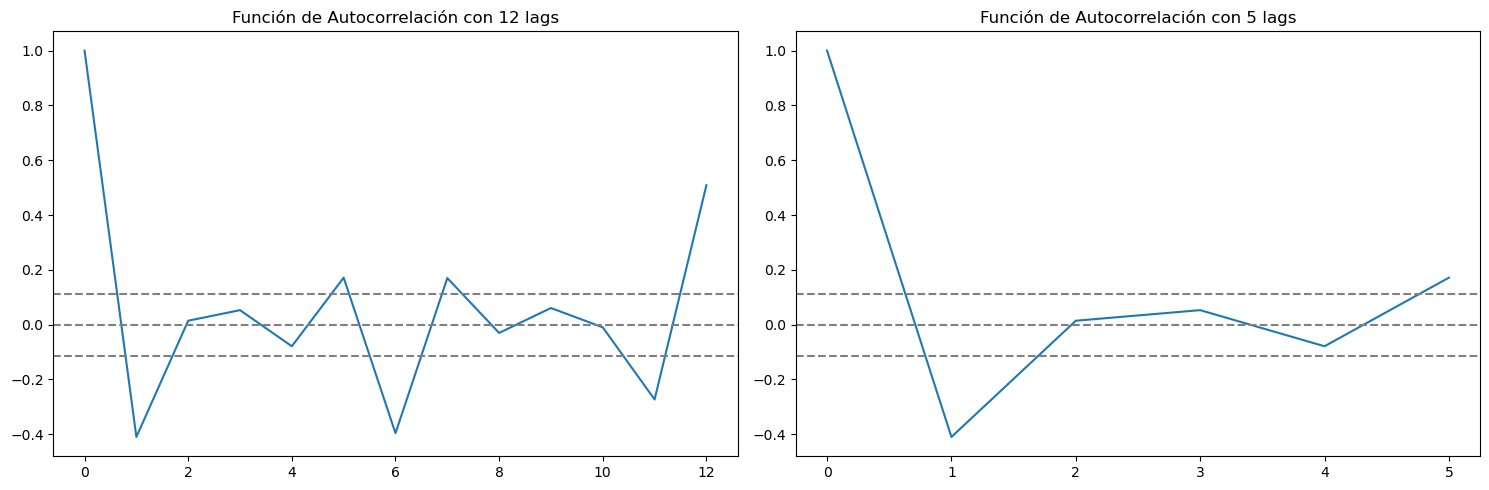

In [37]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(gasolina_superc_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(gasolina_superc_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

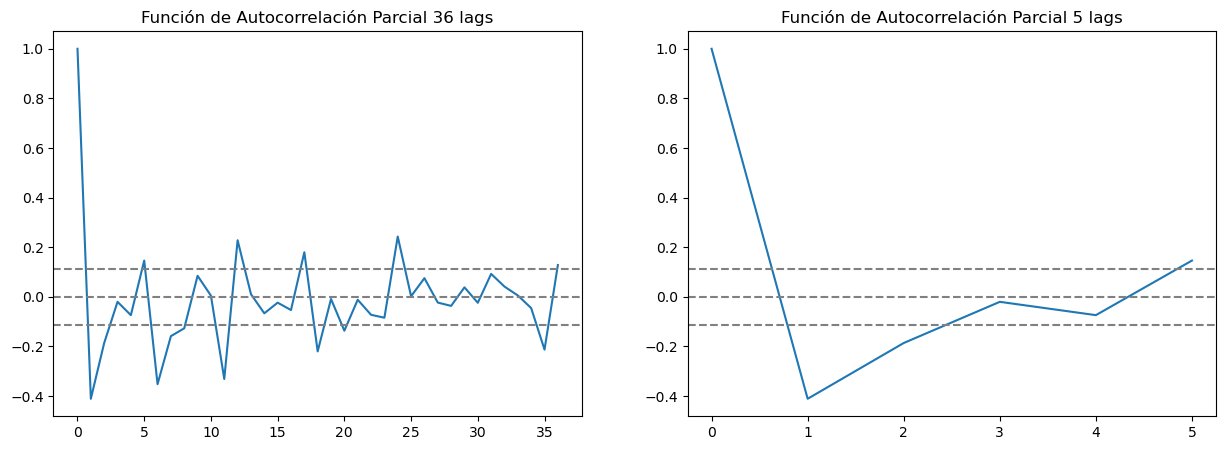

In [38]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(gasolina_superc_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(gasolina_superc_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARIMA. 

Pobraremos modelos con:
- p=1, q=2
- p=2, q=3

Y con d=1

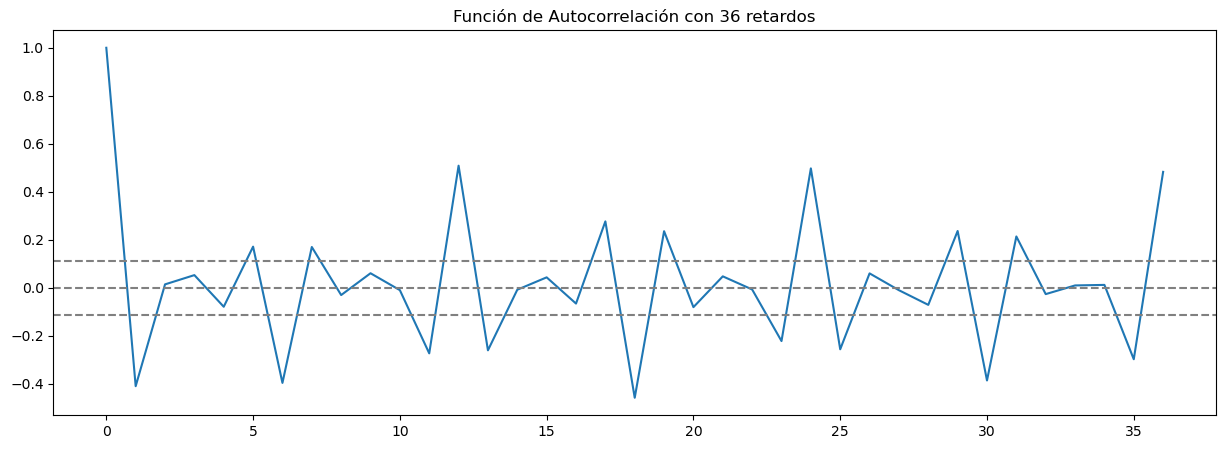

In [39]:
plt.plot(acf(gasolina_superc_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_superc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Si se puede observar un comportamiento similar cada 12 meses, lo que indica que hay estacionalidad cada 12 meses.

In [40]:
tscs = gasolina_superc.diff(12)
tscs.dropna(inplace= True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 lags')

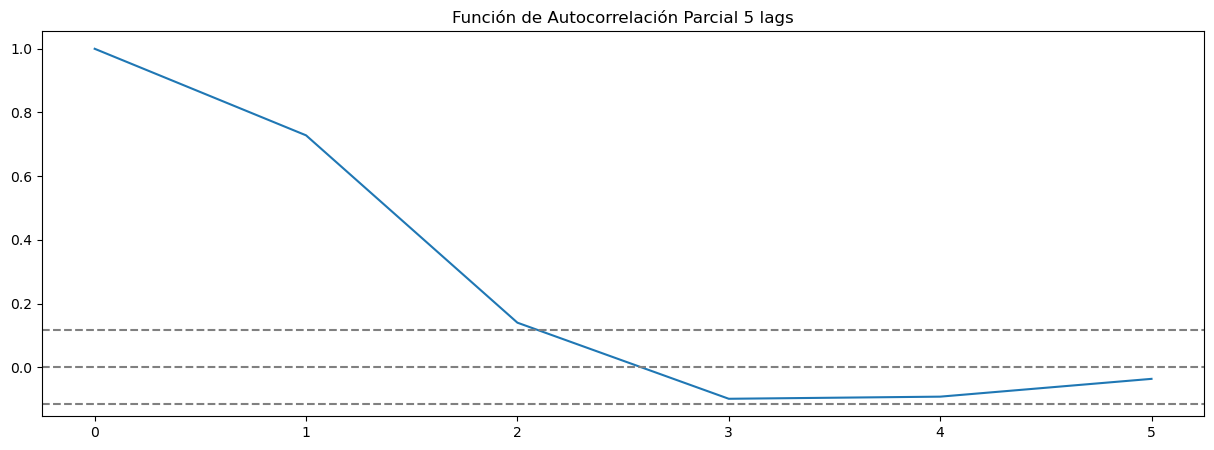

In [41]:
plt.plot(pacf(tscs, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tscs)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tscs)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

In [42]:
modelo112cs = SARIMAX(gasolina_superc, order=(1, 1, 2), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m112cs = modelo112cs.fit()
print(resultado_m112cs.summary().tables[1])

c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7553      0.097      7.776      0.000       0.565       0.946
ma.L1         -1.3430      0.103    -12.994      0.000      -1.546      -1.140
ma.L2          0.2202      0.121      1.824      0.068      -0.016       0.457
ar.S.L12      -0.7212      0.087     -8.308      0.000      -0.891      -0.551
ar.S.L24      -0.3203      0.086     -3.726      0.000      -0.489      -0.152
sigma2      1.622e+09   6.34e-11   2.56e+19      0.000    1.62e+09    1.62e+09


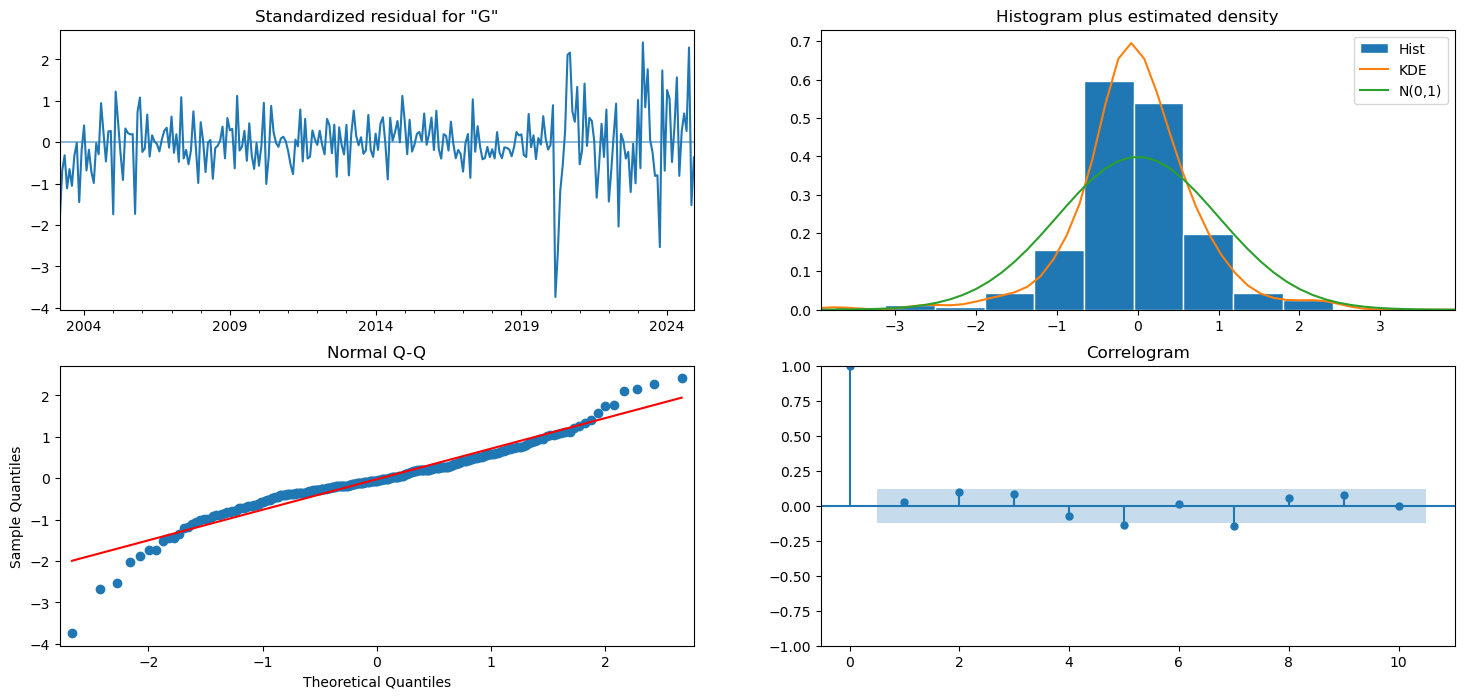

In [43]:
resultado_m112cs.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [44]:
modelo213cs = SARIMAX(gasolina_superc, order=(2, 1, 3), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m213cs = modelo213cs.fit()
print(resultado_m213cs.summary().tables[1])

c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3040      0.212      6.163      0.000       0.889       1.719
ar.L2         -0.6500      0.206     -3.159      0.002      -1.053      -0.247
ma.L1         -1.6704      0.229     -7.292      0.000      -2.119      -1.221
ma.L2          1.2196      0.270      4.517      0.000       0.690       1.749
ma.L3         -0.4138      0.083     -5.003      0.000      -0.576      -0.252
ar.S.L12      -0.7618      0.083     -9.158      0.000      -0.925      -0.599
ar.S.L24      -0.3675      0.071     -5.155      0.000      -0.507      -0.228
sigma2      1.668e+09   5.55e-11      3e+19      0.000    1.67e+09    1.67e+09


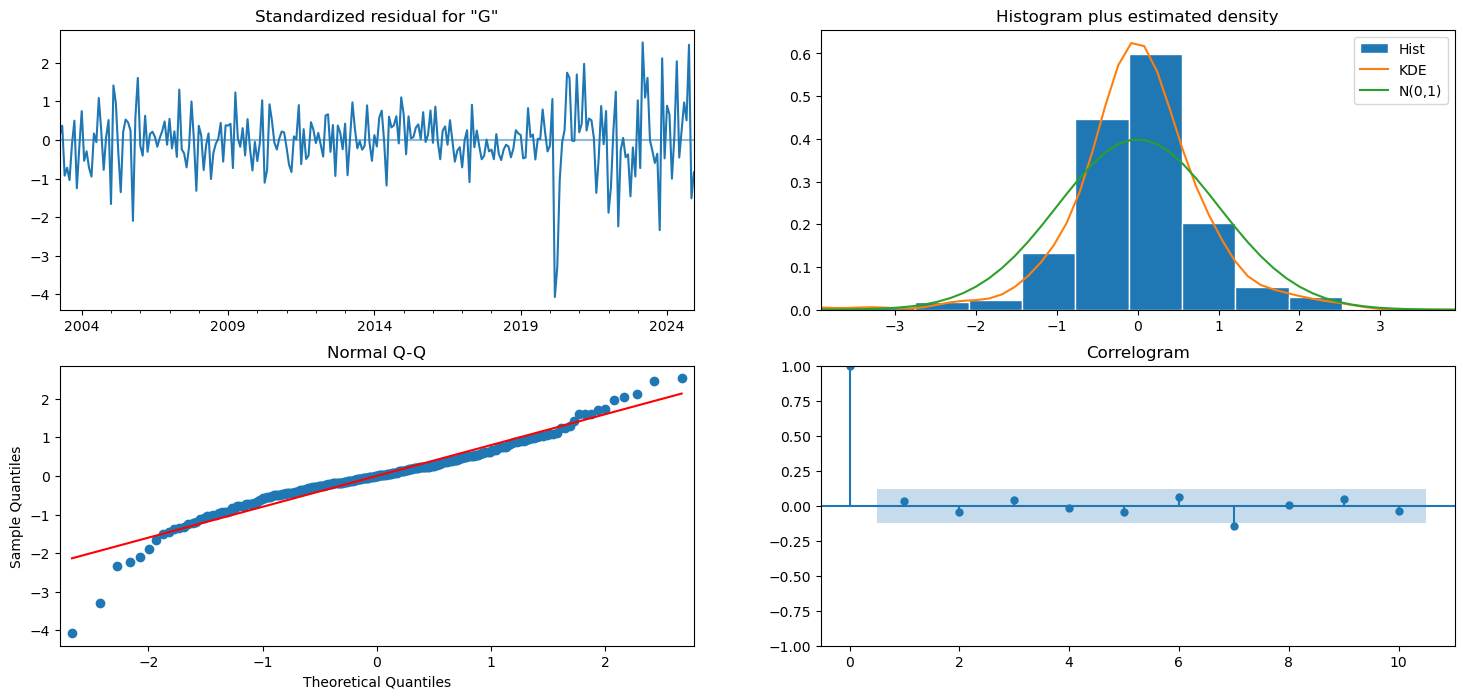

In [45]:
resultado_m213cs.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [46]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 112=",resultado_m112cs.aic)
print("Modelo 213=",resultado_m213cs.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 112=",resultado_m112cs.bic)
print("Modelo 213=",resultado_m213cs.bic)

Resultados de AIC (Akaike information criterion)
Modelo 112= 6266.61386047058
Modelo 213= 6205.152720287635
Resultados de BIC (Bayesian information criterion)
Modelo 112= 6288.023927493146
Modelo 213= 6233.668883546216


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=2, q=3, d=1.

In [47]:
traincs = gasolina_superc[:'2021']
testcs = gasolina_superc['2022':]   
traincs.index[0]

Timestamp('2000-01-01 00:00:00')

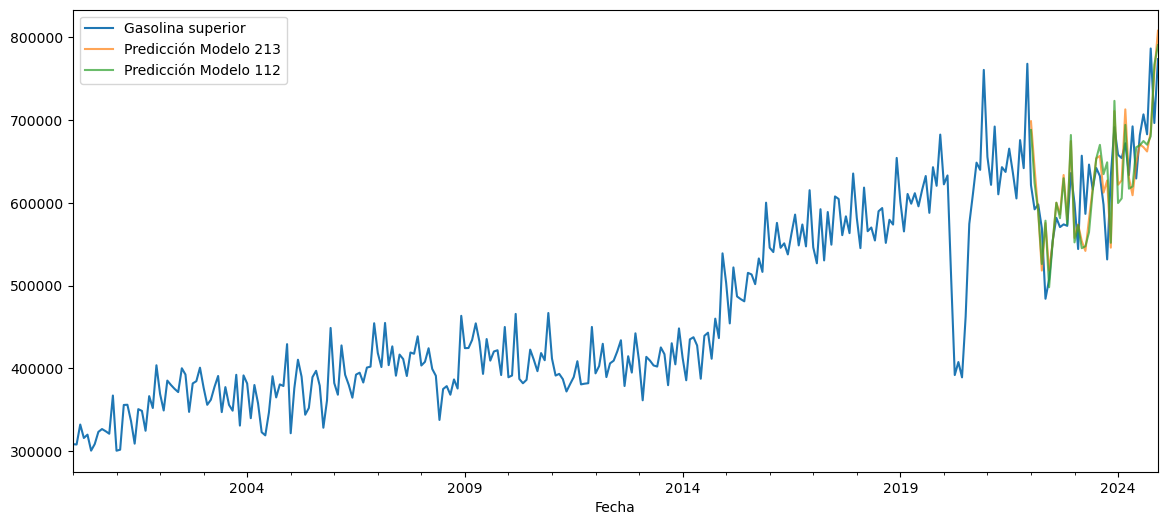

In [48]:
pred1 = resultado_m213cs.get_prediction(start=testcr.index[0], end='2024-12-01', dynamic=False)
pred_ci1 = pred1.conf_int() 

pred2 = resultado_m112cs.get_prediction(start=testcr.index[0], end='2024-12-01', dynamic=False)
pred_ci2 = pred2.conf_int() 

ax = gasolina_superc['2000':'2024'].plot(label='Observado', figsize=(14, 6))

pred1.predicted_mean.plot(ax=ax, label='Predicción Modelo 213', alpha=0.7)

pred2.predicted_mean.plot(ax=ax, label='Predicción Modelo 112', alpha=0.7)

plt.legend()
plt.show()

In [75]:

y_pred1 = pred1.predicted_mean  

y_pred2 = pred2.predicted_mean 

y_true = testcr 

mape1 = mean_absolute_percentage_error(y_true, y_pred1)
print(f'MAPE Modelo 1: {mape1 * 100:.2f}%')

mape2 = mean_absolute_percentage_error(y_true, y_pred2)
print(f'MAPE Modelo 2: {mape2 * 100:.2f}%')

if mape1 < mape2:
    print("El Modelo 213 tiene un mejor MAPE.")
else:
    print("El Modelo 112 tiene un mejor MAPE.")


MAPE Modelo 1: 100.00%
MAPE Modelo 2: 100.00%
El Modelo 213 tiene un mejor MAPE.


Como el modelo213 obtuvo un mejor MAPE se pudo verificar que este es el mejor modelo para predecir el consumo de gasolina super de los ultimos 3 años (2022-2024)

#### **Gasolina Diesel**

In [50]:
gasolina_dieselc = consumos[["Fecha", "Diesel alto azufre"]]
gasolina_dieselc.set_index("Fecha", inplace=True)

print("Consumos:")
print("Inicio:", gasolina_dieselc.index.min())
print("Fin:", gasolina_dieselc.index.max())
print("Frecuencia (estimada):", pd.infer_freq(gasolina_dieselc.index))

Consumos:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia (estimada): MS


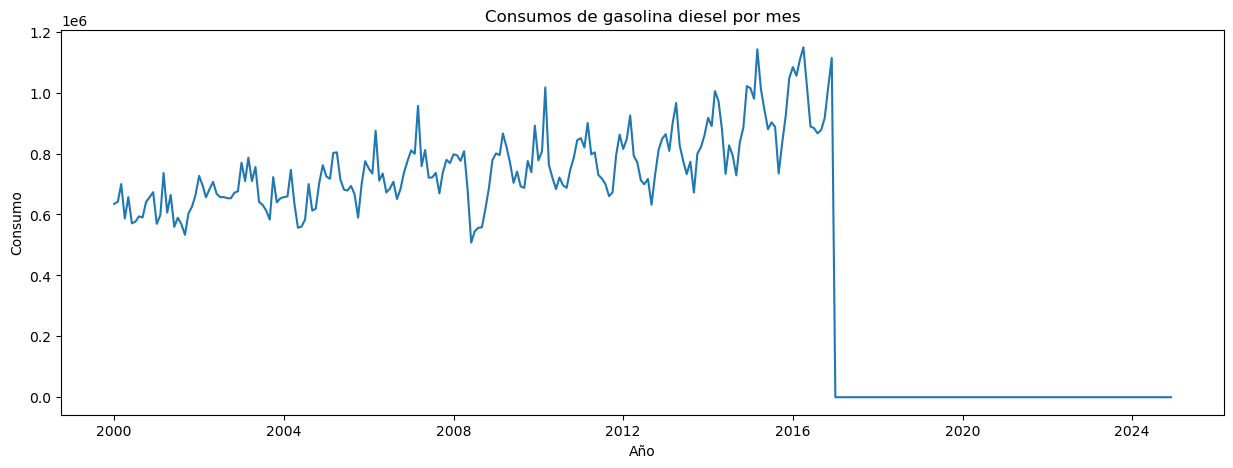

In [51]:
plt.plot(gasolina_dieselc)
plt.gca().set(title="Consumos de gasolina diesel por mes", xlabel="Año", ylabel="Consumo")
plt.show()

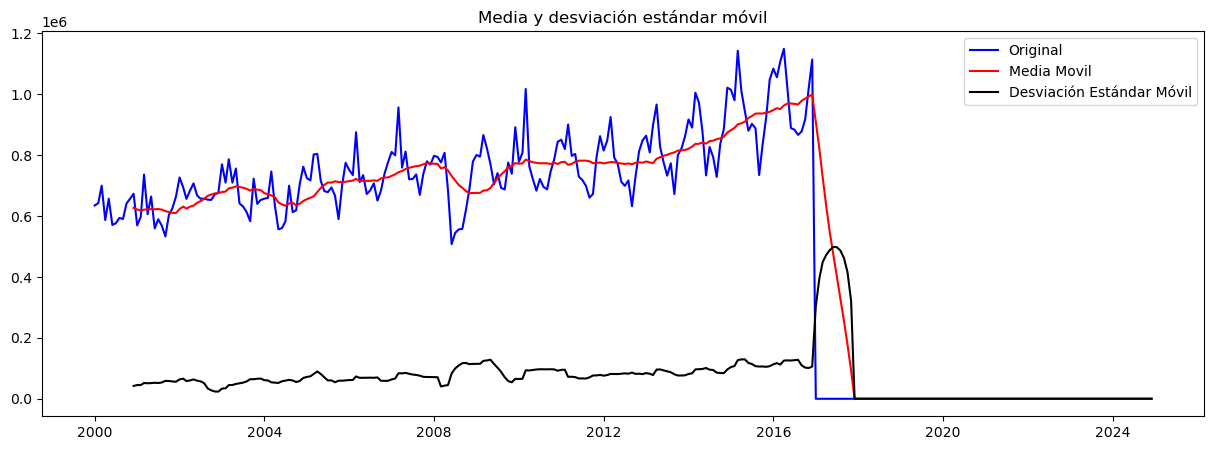

In [52]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovilcd = gasolina_dieselc.rolling(window=12).mean()
deMovilcd = gasolina_dieselc.rolling(window=12).std()
# Se grafican los resultados.
originalcd = plt.plot(gasolina_dieselc, color="blue", label="Original")
mediacd = plt.plot(mediaMovilcd, color='red', label = 'Media Movil')
dscd = plt.plot(deMovilcd,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

Analizando el gráfico podemos concluir que la serie de tiempo muestra una tendencia creciente hasta el año 2017. Esto nos indica que la media no es constante en el tiempo. Por otro lado, la media móvil va en aumento también, lo que da más fundamentos de que puede que la seria no sea estacionaria en media. Además, la desviación estándar móvil aumenta con el tiempo, lo que indica que la varianza tampoco es constante, y que la serie podría no ser estacionaria en varianza. 

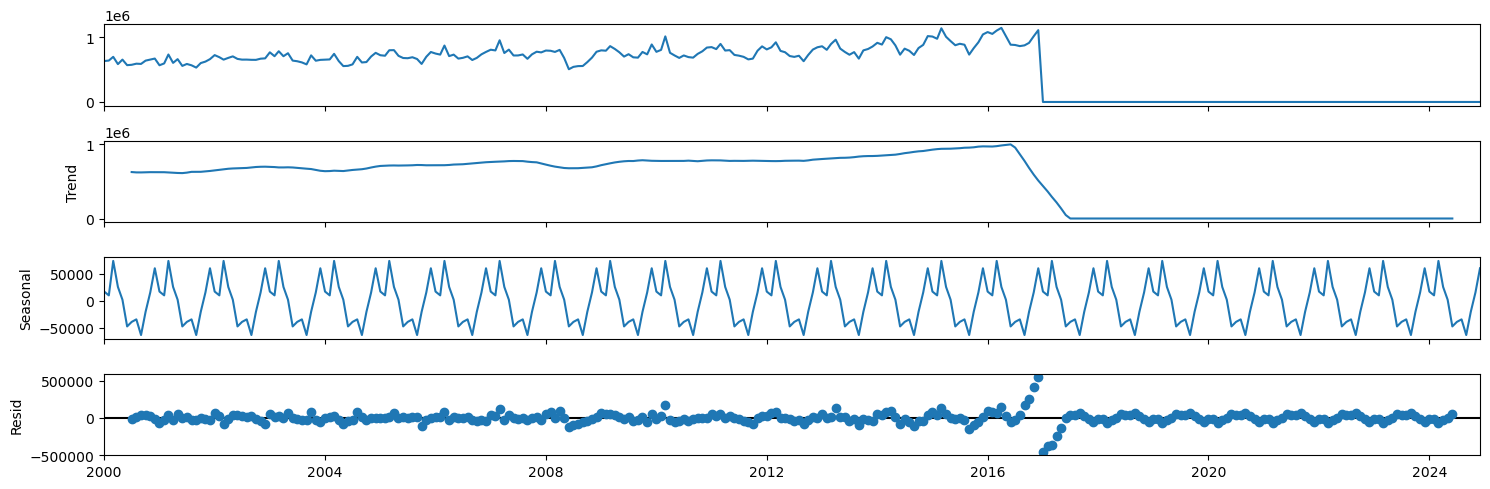

In [53]:
resultcd = seasonal_decompose(gasolina_dieselc)
resultcd.plot()
plt.show()

Analizando el gráfico podemos concluir que:
- Hay tendencia creciente, por lo que la serie no es estacionaria en media. 
- No parece ser estacionaria en varianza.
- Hay estacionalidad clara.

Usando Dickey-Fuller, tomamos: 
- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

In [54]:
print('Resultados del Test de Dickey Fuller')
dfTestcd = adfuller(gasolina_dieselc, autolag='AIC')
salidaDfcd = pd.Series(dfTestcd[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcd[4].items():
        salidaDfcd['Critical Value (%s)'%key] = value
print(salidaDfcd)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -0.901169
p-value                        0.787587
# de retardos usados           6.000000
# de observaciones usadas    293.000000
Critical Value (1%)           -3.452867
Critical Value (5%)           -2.871455
Critical Value (10%)          -2.572053
dtype: float64


El p-value > 0.05, lo que indica que no se puede rechazar la hipótesis nula. 

Aplicamos entonces diferenciación.

In [55]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
gasolina_dieselc_diff = gasolina_dieselc.diff()
gasolina_dieselc_diff.dropna(inplace=True)
dfTestcd = adfuller(gasolina_dieselc_diff)
salidaDfcd = pd.Series(dfTestcd[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTestcd[4].items():
        salidaDfcd['Critical Value (%s)'%key] = value
print(salidaDfcd)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -9.434028e+00
p-value                      5.099255e-16
# de retardos usados         5.000000e+00
# de observaciones usadas    2.930000e+02
Critical Value (1%)         -3.452867e+00
Critical Value (5%)         -2.871455e+00
Critical Value (10%)        -2.572053e+00
dtype: float64


El p-value < 0.05, lo que indica que se rechaza la hipótesis nula, y se concluye que la serie sí es estacionaria. 

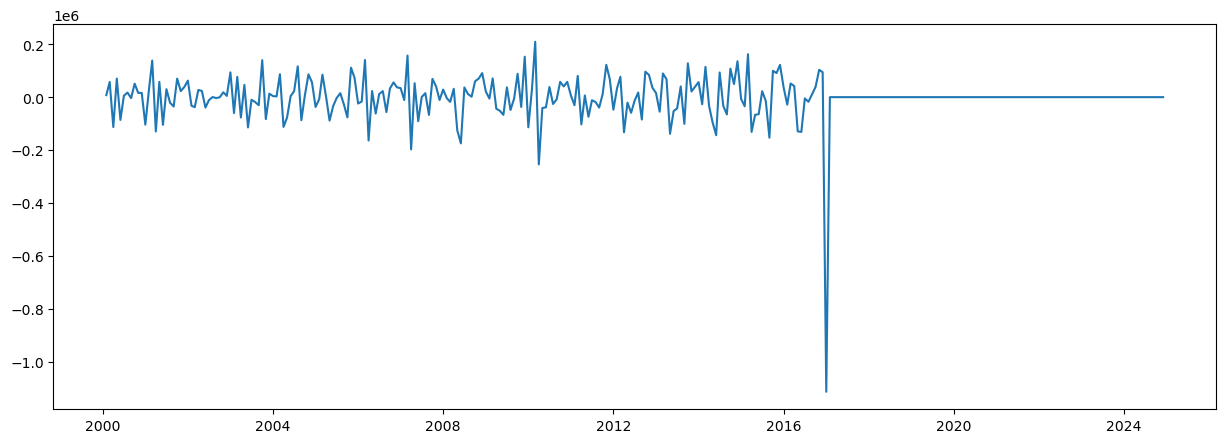

In [56]:
plt.plot(gasolina_dieselc_diff)

Luego se grafica con las transformaciones realizadas, una diferenciación. Con esto podemos decir que la serie es estacionaria en media y en varianza. 

Para encontrar p y q:

In [57]:
tsa_acf = acf(gasolina_dieselc_diff,nlags=5,fft=False)
tsa_pacf = pacf(gasolina_dieselc_diff, nlags=36)
tsa_acf

array([ 1.        , -0.13721184, -0.0455865 , -0.00154883, -0.04124092,
        0.01652169])

In [58]:
tsa_pacf

array([ 1.00000000e+00, -1.37672280e-01, -6.60999762e-02, -1.78145661e-02,
       -4.87866447e-02,  2.67303287e-03, -2.35799028e-01, -5.85512425e-02,
        3.74900814e-02, -7.46123760e-03, -3.96235766e-02,  2.51683322e-04,
        1.91163229e-01, -2.64009352e-03,  1.76032084e-02, -5.95767656e-02,
        4.88996287e-02,  1.87823712e-02, -1.25530777e-01, -1.12445498e-01,
       -1.76046171e-02,  5.31334456e-02, -8.60970410e-02,  5.41285479e-02,
        1.00574173e-01, -2.23558032e-02,  6.59257867e-02, -2.29982366e-02,
       -2.87222966e-02,  5.24042982e-02, -1.94053804e-01,  1.13442914e-02,
        1.96706539e-02, -5.96602538e-02, -2.41112133e-02, -4.77238016e-02,
        7.71711722e-02])

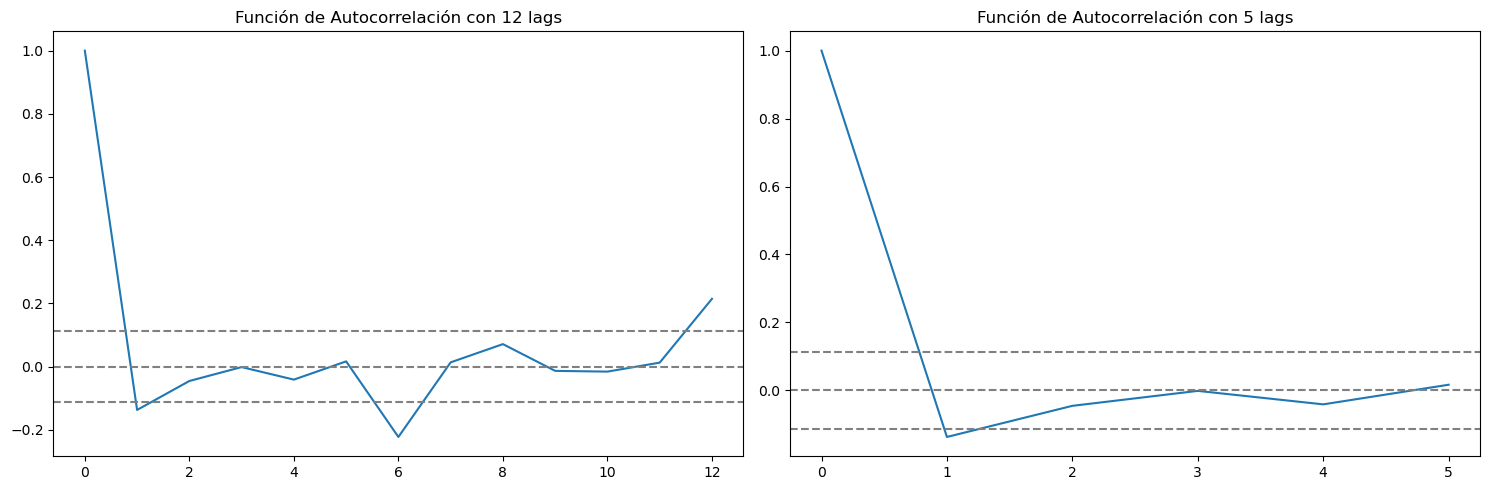

In [59]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(gasolina_dieselc_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 lags')

plt.subplot(122) 
plt.plot(acf(gasolina_dieselc_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 lags')

plt.tight_layout()

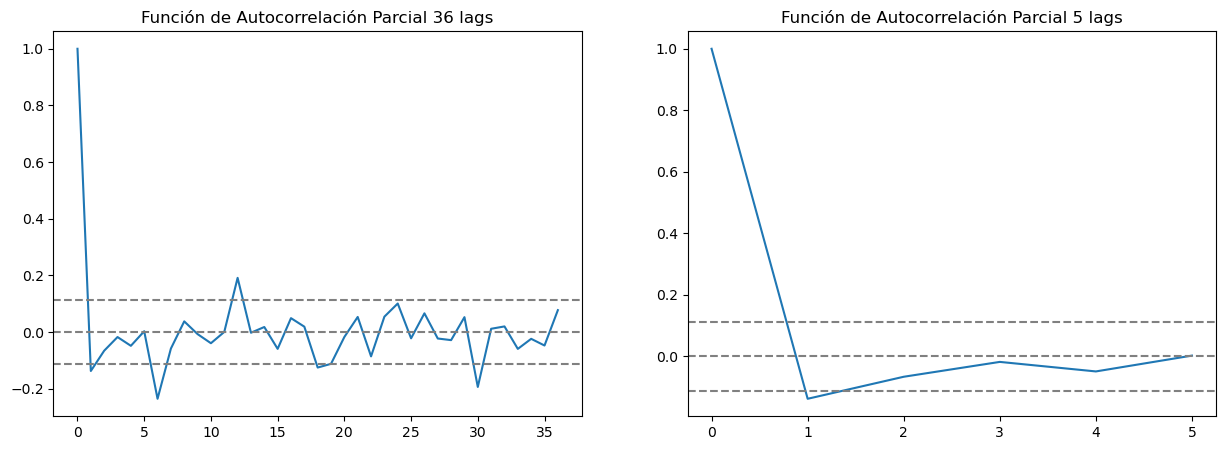

In [60]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(gasolina_dieselc_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 lags')

plt.subplot(122)
plt.plot(pacf(gasolina_dieselc_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Se puede ver que ambas funciones decaen gradualmente, por lo que sabemos que se trata de un modelo ARIMA. 

Pobraremos modelos con:
- p=1, q=1
- p=2, q=2

Y con d=1

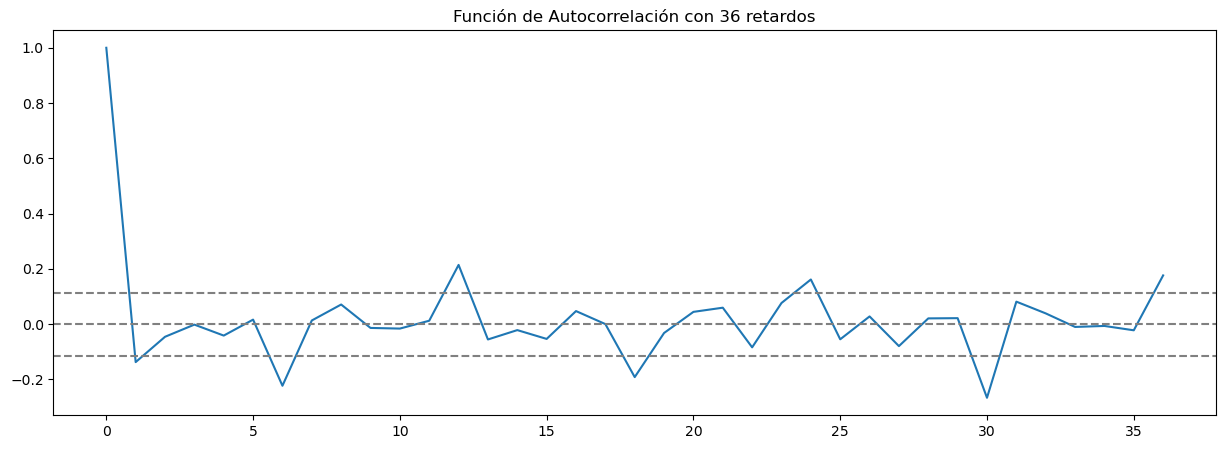

In [61]:
plt.plot(acf(gasolina_dieselc_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(gasolina_dieselc_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

Si se puede observar un comportamiento similar cada 12 meses, lo que indica que hay estacionalidad cada 12 meses.

In [62]:
tscd = gasolina_dieselc.diff(12)
tscd.dropna(inplace= True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 lags')

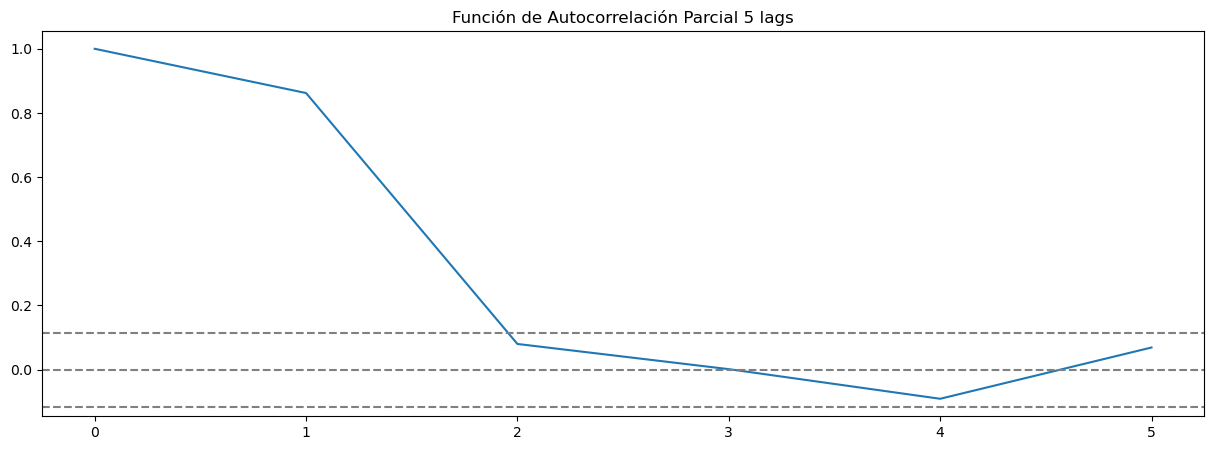

In [63]:
plt.plot(pacf(tscd, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tscd)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tscd)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 lags')

In [64]:
modelo111cd = SARIMAX(gasolina_dieselc, order=(1, 1, 1), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m111cd = modelo111cd.fit()
print(resultado_m111cd.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3227      0.363      0.888      0.375      -0.390       1.035
ma.L1         -0.4842      0.338     -1.434      0.151      -1.146       0.177
ar.S.L12      -0.4730      0.015    -31.164      0.000      -0.503      -0.443
sigma2      1.264e+10   2.22e-10   5.69e+19      0.000    1.26e+10    1.26e+10


c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


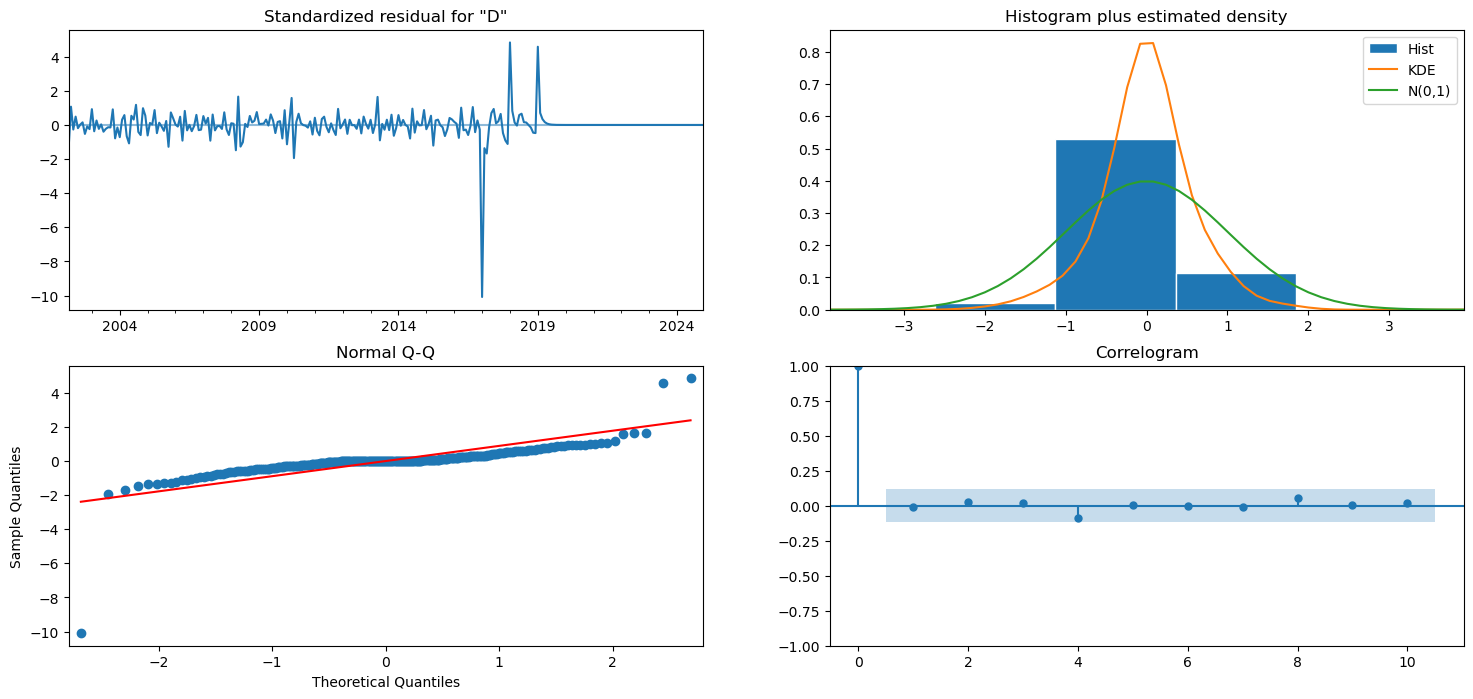

In [65]:
resultado_m111cd.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [66]:
modelo212cd = SARIMAX(gasolina_dieselc, order=(2, 1, 2), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m212cd = modelo212cd.fit()
print(resultado_m212cd.summary().tables[1])

c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dfsf2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8044      0.399     -2.018      0.044      -1.586      -0.023
ar.L2          0.0614      0.452      0.136      0.892      -0.824       0.947
ma.L1          0.6399      0.394      1.623      0.105      -0.133       1.413
ma.L2         -0.2490      0.416     -0.599      0.549      -1.064       0.566
ar.S.L12      -0.4656      0.019    -25.131      0.000      -0.502      -0.429
sigma2      1.278e+10      2e-10    6.4e+19      0.000    1.28e+10    1.28e+10


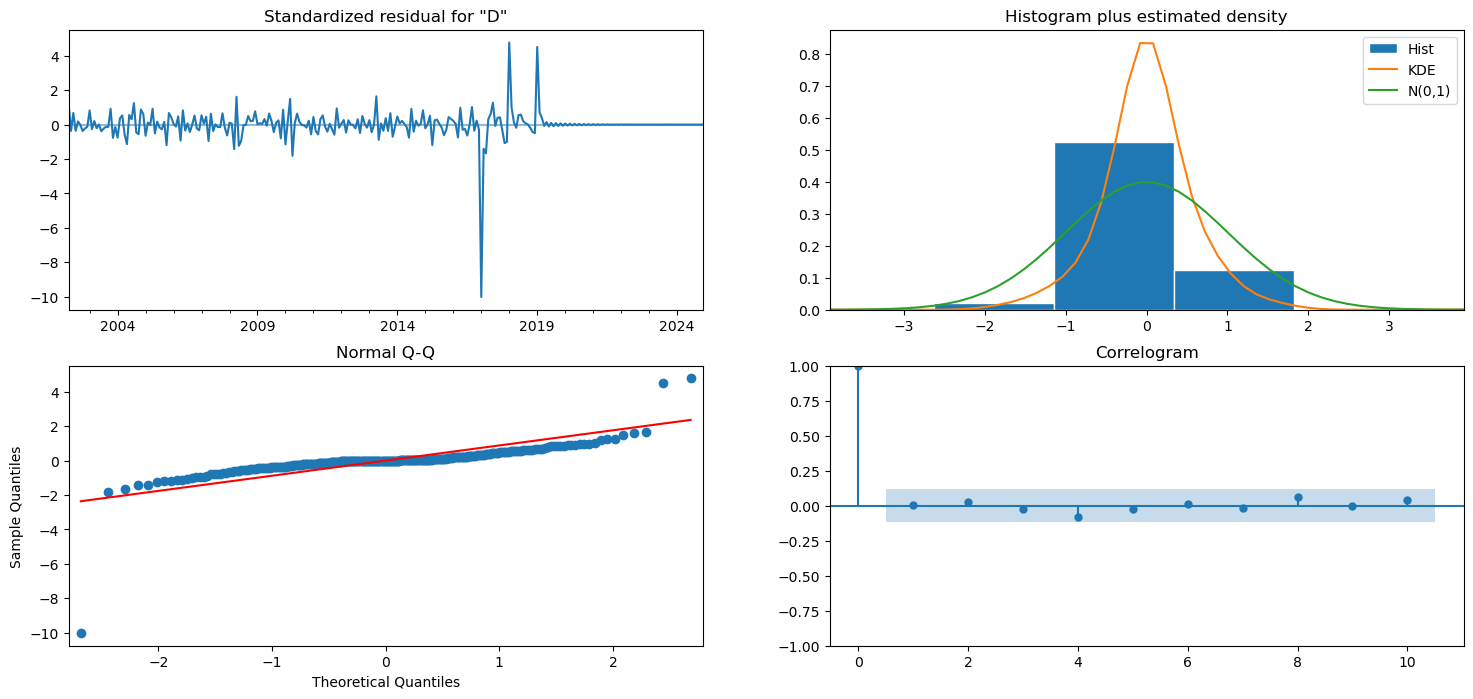

In [67]:
resultado_m212cd.plot_diagnostics(figsize=(18, 8))
plt.show()

Analizando el gráfico podemos ver que:
 - El residuo estándar tiene ruidos distribuidos alrededor de cero y no siguen un patrón
 - El histograma tiene una dist normal, los errores son normales. 
 - El correlogram mantiene la mayoría de puntos en la banza azul. 

In [68]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 111=",resultado_m111cd.aic)
print("Modelo 212=",resultado_m212cd.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 111=",resultado_m111cd.bic)
print("Modelo 212=",resultado_m212cd.bic)

Resultados de AIC (Akaike information criterion)
Modelo 111= 7101.381642388933
Modelo 212= 7078.523537122731
Resultados de BIC (Bayesian information criterion)
Modelo 111= 7115.834154814485
Modelo 212= 7100.18036789384


Analizando los resultados del AIC y BIC, se determina que el mejor modelo es p=2, q=2, d=1.

In [69]:
traincd = gasolina_dieselc[:'2021']
testcd = gasolina_dieselc['2022':]   
traincd.index[0]

Timestamp('2000-01-01 00:00:00')

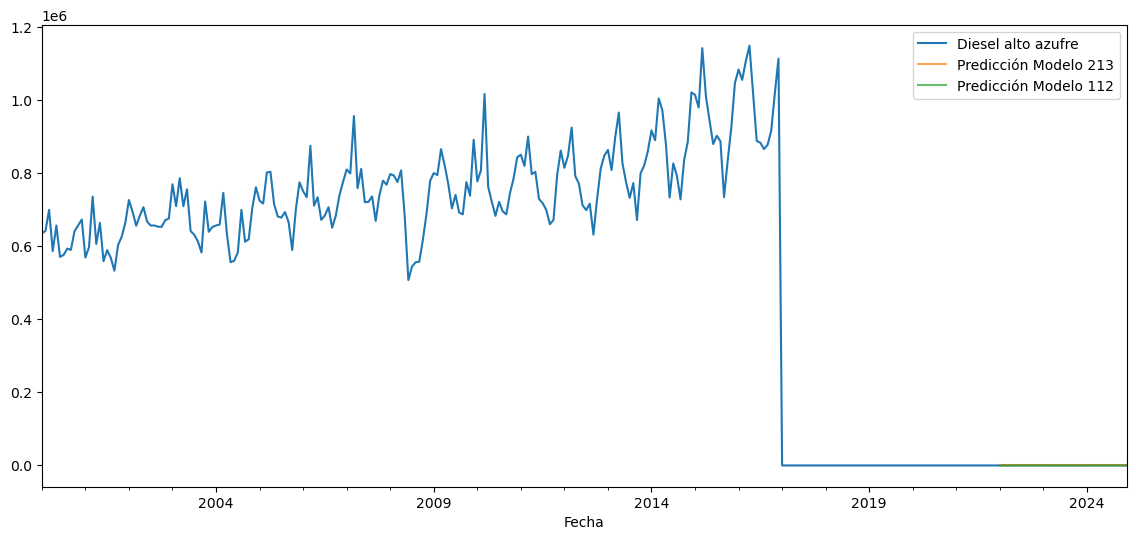

In [71]:
pred1 = resultado_m111cd.get_prediction(start=testcd.index[0], end='2024-12-01', dynamic=False)
pred_ci1 = pred1.conf_int() 

pred2 = resultado_m212cd.get_prediction(start=testcd.index[0], end='2024-12-01', dynamic=False)
pred_ci2 = pred2.conf_int() 

ax = gasolina_dieselc['2000':'2024'].plot(label='Observado', figsize=(14, 6))

pred1.predicted_mean.plot(ax=ax, label='Predicción Modelo 213', alpha=0.7)

pred2.predicted_mean.plot(ax=ax, label='Predicción Modelo 112', alpha=0.7)

plt.legend()
plt.show()

In [72]:
y_pred1 = pred1.predicted_mean  

y_pred2 = pred2.predicted_mean 

y_true = testcr 

mape1 = mean_absolute_percentage_error(y_true, y_pred1)
print(f'MAPE Modelo 1: {mape1 * 100:.2f}%')

mape2 = mean_absolute_percentage_error(y_true, y_pred2)
print(f'MAPE Modelo 2: {mape2 * 100:.2f}%')

if mape1 < mape2:
    print("El Modelo 213 tiene un mejor MAPE.")
else:
    print("El Modelo 112 tiene un mejor MAPE.")

MAPE Modelo 1: 100.00%
MAPE Modelo 2: 100.00%
El Modelo 213 tiene un mejor MAPE.


En este caso como el consumo de gasolina diesel alto en azufre se deja de consumir desde 2017 al aplicar cualquiera de los 2 modelos obtenemos un resultado igual al valor verdadero. Es por esto que en este caso el valor de MAPE sale igual al 100% pero en este caso esto significaria que los modelos predijeron de manera identica los datos reales. 